# SC1003 - Team Allocation Simulator
### FEL2 Group 4, 14/11/2025
|            |Name       |Email Address         |
|:-----------|:----------|:---------------------|
|Group Leader|Yu Jingyao |B0255949J@e.ntu.edu.sg|
|Group Member|Bu Chenfei |B0255900L@e.ntu.edu.sg|
|Group Member|Chen Letong|B0255911F@e.ntu.edu.sg|
|Group Member|Chen Sijing|B0255922A@e.ntu.edu.sg|
|Group Member|Zhang Yiran|B0255957B@e.ntu.edu.sg|


### Table of Contents
*   [1. Brief Introduction](#1.-Brief-Introduction)
    *   [1.1 Final Goal](#1.1-Final-Goal)
    *   [1.2 Computational Thinking We Used](#1.2-Computational-Thinking-We-Used)
    *   [1.3 Pattern Recognition & Problem Decomposition](#1.3-Pattern-Recognition-&-Problem-Decomposition)
*   [2. Algorithm Design Ideas](#2.-Algorithm-Design-Ideas)
*   [3. Preparation](#3.-Preparation)
*   [4. Raw Data Analysis](#4.-Raw-Data-Analysis)
    *   [4.1 Data Visualization](#4.1-Data-Visualization)
    *   [4.2 Gini-Simpson Index](#4.2-Gini-Simpson-Index)
    *   [4.3 Analysis & Reflection](#4.3-Analysis-&-Reflection)
*   [5. Developing scoring criteria](#5.-Developing-scoring-criteria)
    *   [5.1 Entropy Method](#5.1-Entropy-Method)
    *   [5.2 Scoring Criteria](#5.2-Scoring-Criteria)
    *   [5.3 Pseudocode](#5.3-Pseudocode)
*   [6. Greedy Algorithm](#6.-Greedy-Algorithm)
    *   [6.1 Principle](#6.1-Principle)
    *   [6.2 Pseudocode](#6.2-Pseudocode)
    *   [6.3 Result Visualization](#6.3-Result-Visualization)
    *   [6.4 Analysis & Reflection](#6.4-Analysis-&-Reflection)
*   [7. Simulated Annealing](#7.-Simulated-Annealing)
    *   [7.1 Principle](#7.1-Principle)
    *   [7.2 Implementation](#7.2-Implementation)
    *   [7.3 Annealing schedule](#7.3-Annealing-schedule)
    *   [7.4 Cooling rate](#7.4-Cooling-rate)
    *   [7.5 Pseudocode](#7.5-Pseudocode)
    *   [7.6 Analysis & Reflection](#7.6-Analysis-&-Reflection)
    *   [7.7 Preparation for Entire Result Visualization](#7.7-Preparation-for-Entire-Result-Visualization)
*   [8. Data Export & Main Program Construction](#8.-Data-Export-&-Main-Program-Construction)
*   [9. Algorithm Judgement and Selection](#9.-Algorithm-Judgement-and-Selection)
    *   [9.1 Select the best algorithm](#9.1-Select-the-best-algorithm)
    *   [9.2 Select the best weights](#9.2-Select-the-best-weights)
    *   [9.3 Hyperparameter Tuning](#9.3-Hyperparameter-Tuning)
    *   [9.4 Final Version](#9.4-Final-Version)
    *   [9.5 Additional Requirements](#9.5-Additional-Requirements)
*   [10. Conclusion & Reflection](#10.-Conclusion-&-Reflection)
*   [11. Reference](#11.-Reference)
*   [12. Declaration for the Use of AI Tools](#12.-Declaration-for-the-Use-of-AI-Tools)

# 1. Brief Introduction

### 1.1 Final Goal

Given a CSV file containing 120 tutoring groups, each group containing information on 50 students (school, gender, and CGPA), develop an application that can divide students into groups of five, taking into account the balance of students' 3 properties in each group.

Both **Basic version** (5 students per group only) and **Enhance verion** (4~10 students per group) are combined and well implemented as follows.

### 1.2 Computational Thinking We Used

- **Pattern Recognition**
- **Decomposition**
- **Abstraction**
- **Algorithm Design**

*In each step of the code analysis below, we will annotate the corresponding **Computational Thinking**.*

### 1.3 Pattern Recognition & Problem Decomposition
- Noting that grouping only needs to be done within **each Tutorial Group**, the overall task becomes **designing a method to divide 50 people into several groups and repeat this process 120 times.**

- Thus, we break down the goal into the following steps and implement them one by one:
	1. **Load the data** and format it as needed
	2. **Analyze the raw data** and assess the differences between the groups
	3. **Design an algorithm** to group the members of the 120 Tutorial Groups
	4. **Visualize** the grouping results
	5. **Compare and evaluate** the algorithm's results
	6. **Adjust hyperparameters** of algorithm after selecting a suitable one
	7. **Run the algorithm** and **export the grouping results**

*Computational Thinking: Pattern Recognition, Problem Decomposition*

# 2. Algorithm Design Ideas
- To achieve a balance in gender, school, and average CGPA within each group, we initially used a **greedy algorithm**, selecting the most suitable student at each grouping step.
- However, good performance at each step does not guarantee good overall performance. To escape this local optimum, we chose the **simulated annealing** algorithm, randomly swapping any two students from any two groups several times, with a certain probability of accepting swaps that worsen overall performance. 
- As the Chinese saying goes, "塞翁失马，焉知非福" (A loss may turn out to be a blessing in disguise). This gives the algorithm a chance to find better grouping results.

*Computational Thinking: Pattern Recognition, Problem Decomposition, Algorithm Design*

# 3. Preparation

Before starting, we import some necessary module.
- `random` for random selections
- `math` for logarithmic operations
- `defaultdict` for a dictionary automatically providing default values ​​for non-existent keys
- `csv` for loading & writing .csv files
- `matplotlib.pyplot` & `seaborn` for visualizing data and grouping results
- `ipywidgets` & `IPython.display` for improvment of the interactivity of grouping results
- `time` for calculating program running time

In [1]:
import random
import math
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

Also, some **global variables and settings** are necessary, too.

In [2]:
GP_SIZE = 50 # Number of student in each tutorial group
RANDOM_SEED = 42 
random.seed(RANDOM_SEED) # Set a random seed to ensure the results are reproducible
# A set of default weights, used in our algorithm
DEFAULT_WEIGHTS = {
    "School": {'Gender': 0.1, 'School':0.8, 'CGPA':0.1}, # ignore school
    "Gender": {'Gender': 0.8, 'School':0.1, 'CGPA':0.1}, # ignore gender
    "CGPA": {'Gender': 0.1, 'School':0.1, 'CGPA':0.8}, # ignore CGPA
    } 
plt.style.use('seaborn-v0_8-whitegrid') # Define the style of charts

To make information managable, we introduce some **classes**, one kind of data abstraction, to store it.

The advantages of using `class` is that:
- Group related data and functions together
    - This keeps the code organized and prvents variables and functions from being scattered everywhere.
- Easier maintainance and expansion
    - If you want to change the behaviors of an object, you only needs to change the class definition. 
    - This makes the code easier to maintain and extend as it grows.

*Computational Thinking: Data Abstraction*

In [3]:
# Student
class Student:
    def __init__(self, tutorial_group, student_id, school, name, gender, cgpa):
        self.tutorial_group = tutorial_group
        self.student_id = student_id
        self.school = school
        self.name = name
        self.gender = gender
        self.cgpa = float(cgpa)
        self.group_num = -1

# Group
class Group:
    def __init__(self, group_id):
        self.group_id = group_id 
        self.groupmate = [] # List[Student]
        self.score = 0
        self.male_ratio = 0
        self.school_ratio = {} # Dict{school_name: number_of_student}
        self.avg_cgpa = 0
        self.size = 0

# Tutorial Group
class TutorialGroup:
    def __init__(self, group_id):
        self.group_id = group_id
        self.groupmate = []  # List[Student]
        self.groups = {} # Dict{index_of_group: Group}
        self.male_ratio = 0
        self.schools_ratio = {}
        self.avg_cgpa = 0
        self.cgpa_range = 0
        self.size = 0
        self.weights = {} # {'School':x,'Gender':y,'CGPA':z}

Since everything is well prepared, we load all students' information in a dicctionary, whose structure is like:
```{python}
dataset = {
    'G-1': TutorialGroup(group_id='G-1'), 
    'G-10': TutorialGroup(group_id='G-10'), 
    'G-100': TutorialGroup(group_id='G-100'), 
    ......
    'G-98': TutorialGroup(group_id='G-98'), 
    'G-99': TutorialGroup(group_id='G-99')
}
```
*Computational Thinking: Data Abstraction*

In [4]:
def read_csv(file_path:str)->dict:
    dataset = {} 
    with open(file_path, newline='', encoding='utf-8') as f: # To prevent blank lines and ensure correct formatting.
        reader = csv.DictReader(f) # Read a .csv file and automatically convert it into a dictionary
        for info in reader:
            # Creat a new student object
            new_student = Student(
                tutorial_group = info["Tutorial Group"],
                student_id = info["Student ID"],
                school = info["School"],
                name = info["Name"],
                gender = info["Gender"],
                cgpa = info["CGPA"],
            ) 
            # If the current tutorial group does not exist, then create it.
            if new_student.tutorial_group not in dataset: 
                dataset[new_student.tutorial_group] = TutorialGroup(new_student.tutorial_group)
            # Add student to current group
            dataset[new_student.tutorial_group].groupmate.append(new_student) 
    return dataset

# 4. Raw Data Analysis

### 4.1 Data Visualization
To facilitate data analysis, pre-calculate the **gender ratio, school distribution and the CGPA distribution** of each tutorial group is essential. 
- For gender ratio, since everyone is either male or female, we choose **male ratio** for representative.
- For school distribution, we record the **schools that appeared** and the **number of people** at each school in dictionary form.
- For CGPA distribution, we calculate the **average CGPA** and the **range of CGPA**

All the results will be stored into relevant classes

*Computational Thinking: Data Abstraction, Problem Decomposition*

In [5]:
# function calc_ratio() is reuseable, thus its argument is a list instead of a self-defined class
def calc_ratio(group:list):
    male_count = 0
    cgpas = []
    schools = {}
    size = len(group)
    for student in group:
        cgpas.append(student.cgpa)
        schools[student.school] = schools.get(student.school, 0) + 1
        male_count += student.gender == 'Male'
    male_ratio = male_count / size
    avg_cgpa = sum(cgpas) / size
    cgpa_range = max(cgpas) - min(cgpas)
    schools_ratio = {key: value / size for key, value in schools.items()}
    return male_ratio, schools_ratio, avg_cgpa, cgpa_range, size

# calculte groups' properties
def calc_ratio_groups(groups:dict):
    for group in groups.values():
        group.male_ratio, group.school_ratio, group.avg_cgpa, _, group.size = calc_ratio(group.groupmate)

# calculte tutorial groups' properties
def calc_ratio_dataset(dataset:dict):
    for tutorial_group in dataset.values():
        tutorial_group.male_ratio, tutorial_group.schools_ratio, tutorial_group.avg_cgpa, tutorial_group.cgpa_range, tutorial_group.size = calc_ratio(tutorial_group.groupmate)


Test if the test data is successfully read and processed.

In [6]:
# TEST: To ensure that record.csv can be properly loaded and formed, and ratios are well calculated
dataset = read_csv("assets/records.csv")
calc_ratio_dataset(dataset)
print(dataset['G-1'].schools_ratio)

{'CCDS': 0.1, 'EEE': 0.2, 'CoB (NBS)': 0.16, 'SoH': 0.1, 'WKW SCI': 0.04, 'CoE': 0.06, 'MAE': 0.08, 'SPMS': 0.04, 'SBS': 0.02, 'SSS': 0.1, 'ASE': 0.02, 'NIE': 0.02, 'ADM': 0.02, 'CCEB': 0.02, 'MSE': 0.02}


Expected result: 
```
{'CCDS': 0.1, 'EEE': 0.2, 'CoB (NBS)': 0.16, 'SoH': 0.1, 'WKW SCI': 0.04, 'CoE': 0.06, 'MAE': 0.08, 'SPMS': 0.04, 'SBS': 0.02, 'SSS': 0.1, 'ASE': 0.02, 'NIE': 0.02, 'ADM': 0.02, 'CCEB': 0.02, 'MSE': 0.02}
```

Then, we visualize those raw info in 3 chart:
1. Histogram of **frequency distribution of male proportion** in each group
2. Histogram of **Gini Simpson Index of schools** in each group
3. Scatter plot of **mean vs. standard deviation of CGPA** in each group

The drawing process is decomposed into: 
1. Collecting data from class 
2. Processing and calculating this data
3. Graphing 3 charts respectively

*Computational Thinking: Problem Decomposition*

### 4.2 Gini-Simpson Index
In terms of Gini-Simpson Index, it is defined as:
$$ GS = \sum_{i}^{}  p_{i}{(1-p_{i})} = 1 - \sum_{i}^{} p_{i}^{2} 
$$
where $p_{i}$ is the frequency of each catagory, $p_{i}>0$, $\sum_{i}p_{i}=1$, and it measure the **diversity** of a set of data (R. Guiasu & S. Guiasu, 2010). 

Generally, **the bigger GS is, the more diverse the group is.** We abstract the diversity into such index successfully.

*Computational Thinking: Abstraction*

In [7]:
# function that calculate Gini-Simpson Index
def calc_school_gini_simpson_index(tutorialgroup_schools_ratio:dict)->float:
    return 1 - sum(school_ratio**2 for school_ratio in tutorialgroup_schools_ratio.values())

# Caculate the standerd deviation of CGPA
def calc_std_dev_cgpa(tutorialgroup:TutorialGroup)->float:
    avg_cgpa = tutorialgroup.avg_cgpa
    var_cgpa = sum((student.cgpa-avg_cgpa)**2 for student in tutorialgroup.groupmate) / tutorialgroup.size
    std_dev_cgpa = var_cgpa ** 0.5
    return std_dev_cgpa

# Graph the iestogram of frequency distribution of male proportion in each group
def plot_male_ratios(male_ratios:list):
    plt.figure(figsize=(10, 6))
    plt.hist(male_ratios, bins=10, edgecolor='black', color='#2a9d8f', alpha=0.7)
    plt.title('Distribution of Male Ratio Among 120 Tutorial Groups')
    plt.xlabel('Male Ratio')
    plt.ylabel('Number of Tutorial Groups')
    plt.grid(True)

# Graph the histogram of Gini Simpson Index of schools in each group
def plot_school_gini_simpson_indexs(school_gini_simpson_indexs:list):
    plt.figure(figsize=(10, 6))
    plt.hist(school_gini_simpson_indexs, bins=10, edgecolor='black', color='#52b788', alpha=0.7)
    plt.title('Distribution of School Diversity Among 120 Tutorial Groups')
    plt.xlabel('Gini-Simpson Diversity Index (Higher means more diverse)')
    plt.ylabel('Number of Tutorial Groups')
    plt.grid(True)

# Graph the scatter plot of mean vs. standard deviation of CGPA in each group
# The further to the right, the better the group's general performance; the higher up, the more dispersed the group's performance
def plot_cgpa_distribution(avg_cgpas:list, std_dev_cgpas:list):
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_cgpas, std_dev_cgpas, color='seagreen', alpha=0.7)
    plt.title('Distribution of CGPA Among 120 Tutorial Groups')
    plt.xlabel('Average CGPA')
    plt.ylabel('Standard Deviation of CGPA (Higher means more diverse)')
    plt.grid(True)

# Graph all 3 charts
def plot_distribution(dataset):
    male_ratios = [tutorialgroup.male_ratio for tutorialgroup in dataset.values()]
    school_gini_simpson_indexs = [calc_school_gini_simpson_index(tutorialgroup.schools_ratio) for tutorialgroup in dataset.values()]
    avg_cgpas = [tutorialgroup.avg_cgpa for tutorialgroup in dataset.values()]
    std_dev_cgpas = [calc_std_dev_cgpa(tutorialgroup) for tutorialgroup in dataset.values()]
    plot_male_ratios(male_ratios)
    plot_school_gini_simpson_indexs(school_gini_simpson_indexs)
    plot_cgpa_distribution(avg_cgpas, std_dev_cgpas)

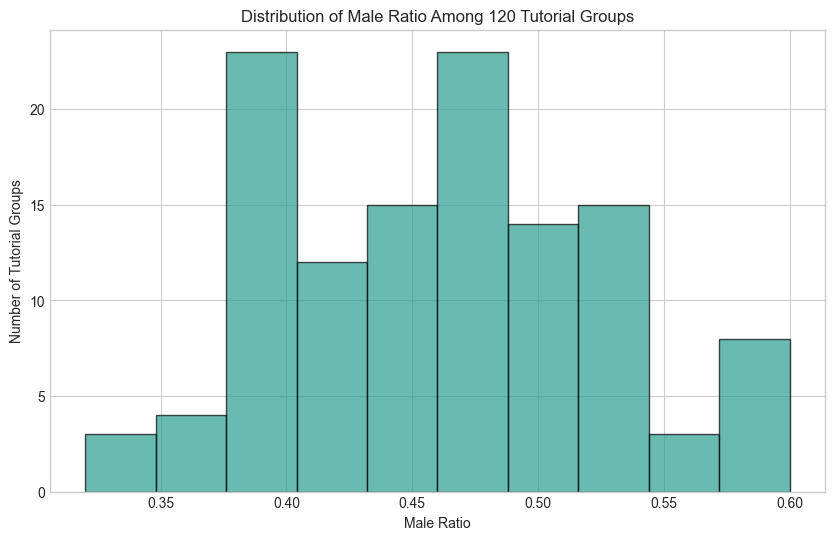

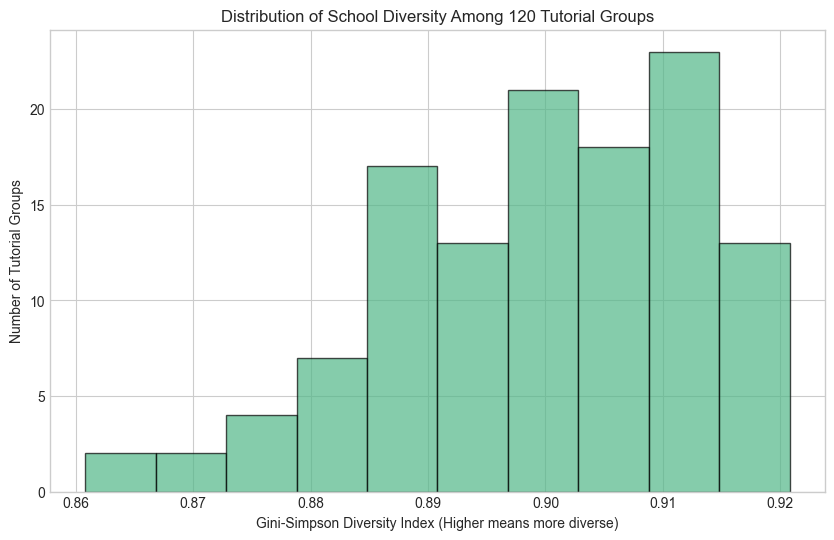

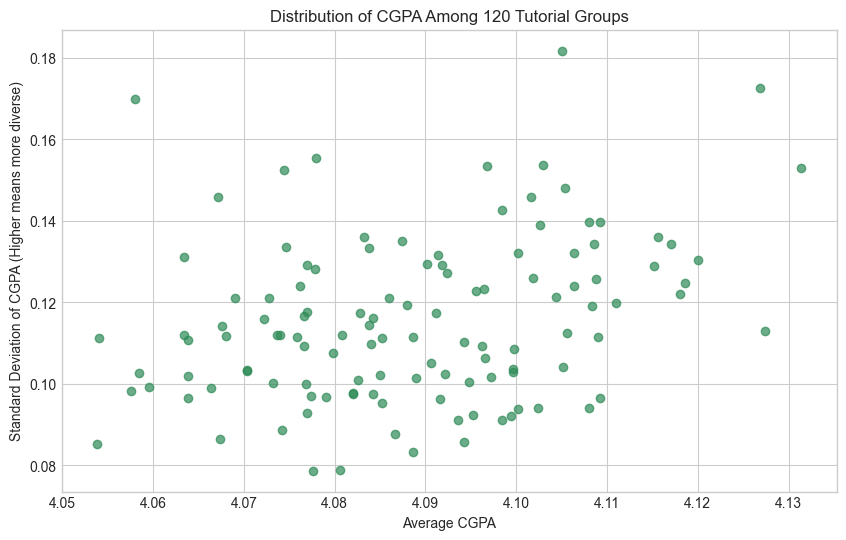

In [8]:
plot_distribution(dataset)

Expected Result:

<img src="assets\distribution_of_male_ratio.png" width="25%" id="distribution_of_male_ratio">
<img src="assets\distribution_of_school_diversity.png" width="25%" id="distribution_of_school_diversity">
<img src="assets\distribution_of_CGPA.png" width="25%" id="distribution_of_CGPA">

### 4.3 Analysis & Reflection
As shown in the figure, the situation **varies greatly** among the groups: 
- In terms of gender, some groups have males making up as much as 60%, while others have less than 40%
- In terms of schools, some groups have a wide variety of schools, while others have very few
- In terms of CGPA, some groups have low averages and low dispersion, while others have high averages and high dispersion

Therefore, we believe it is necessary to **customize** grouping criteria based on these three attributes when actually grouping students. 

The method to tackle this circumstance is called **Entropy Method**


# 5. Developing scoring criteria

Judging the quality of a tutorial group requires considering factors including gender, school, and CGPA with its own scoring criteria. 

Then we introduce the **Entropy method** to calculate weights for each of the score, and then reasonably combine these criteria by computing the **weighted sum** as a final score of grouping quality. 

We stipulate that, the **lower the final score is, the more diverse the group members are, the more ideal the grouping is**.

Then the mission is devided in two parts: calculate the weight, and then calculate the final score. 

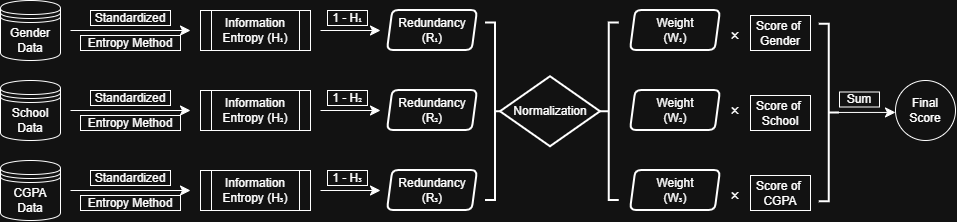


### 5.1 Entropy Method
The **entropy method** is fundamentally based on **information entropy**. Shannon (1948) proposed that information entropy ($H$) reflects the amount of information in a given set of data:
$$H = -K \sum_{i=1}^{n}p_{i}\log(p_{i})$$
where $n$ is the number of catagories, $K$ is a ratio constant (we choose $K = \frac{1}{\ln N}$ for normalization, $N$ is the number of data),  $p_{i}$ is the frequency of each catagory, $p_{i}>0$, $\sum_{i=1}^{n}p_{i}=1$.

The greater the amount of information, the greater the information entropy.

In our algorithm:
- **The more** discrete the score distribution......
- **The more** types of schools there are........
- **The more** balanced the gender ratio......
, **the greater** the information entropy.

Obviously, **the greater** the information entropy in a certain aspect, **the less** we need to consider that aspect, thus **the less** weight it should have, since it is too chaotic to orderly group it.

Therefore, we subtract each information entropy from 1 (we named it as redundancy) and normalize them to obtain three weights that **sum to 1** and can **represent the diversity** of information.

*Computational Thinking: Abstraction, Decomposition, Algorithm Design*

In [9]:
def entropy_weight(data_matrix:list)->list:
    n = len(data_matrix) # Number of students
    m = len(data_matrix[0]) # Number of properties
    norm = []
    for j in range(m):
        col = [data_matrix[i][j] for i in range(n)]
        min_val, max_val = min(col), max(col)
        norm_col = [(x - min_val) / (max_val - min_val + 1e-9) for x in col]
        norm.append(norm_col) # Standardize the raw data
    norm_T = list(zip(*norm)) # Transpose matrix

    ratio_matrix = []  # Ratio Matrix P
    for j in range(m):
        col = [norm_T[i][j] for i in range(n)]
        col_sum = sum(col) + 1e-9
        ratio_matrix.append([x / col_sum for x in col])

    entropy = [] # Entropy E
    for j in range(m):
        e = -sum([p * math.log(p + 1e-9) for p in ratio_matrix[j]]) / math.log(n)
        entropy.append(e)

    redundancy = [1 - e for e in entropy] # Redundancy D & Weights W
    weights = [d / sum(redundancy) for d in redundancy]
    return weights

# Convert textual indicators into numerical weights
def encode_category(value:int, mapping_dict:dict)->int:
    if value not in mapping_dict:
        mapping_dict[value] = len(mapping_dict) + 1 # code
    return mapping_dict[value]

# Calculate weights
def calc_weights(dataset:dict):
    school_map, gender_map = {}, {}
    for tg in dataset.values():
        data_matrix = []
        for student in tg.groupmate:
            school_code = encode_category(student.school, school_map)
            gender_code = encode_category(student.gender, gender_map)
            cgpa_value = student.cgpa
            data_matrix.append([school_code, gender_code, cgpa_value])
        weights = entropy_weight(data_matrix)
        tg.weights = {"School": weights[0],"Gender": weights[1],"CGPA": weights[2]}

In [10]:
# TEST: if weights is correctly computed
calc_weights(dataset)
print(dataset['G-69'].weights)
print(dataset['G-108'].weights)
print(dataset['G-5'].weights)

{'School': 0.290135576539953, 'Gender': 0.6200975336954695, 'CGPA': 0.08976688976457747}
{'School': 0.3485283347516842, 'Gender': 0.557263062686625, 'CGPA': 0.0942086025616909}
{'School': 0.4497278545149964, 'Gender': 0.4347494030990074, 'CGPA': 0.11552274238599615}


Expected result:
```
{'School': 0.290135576539953, 'Gender': 0.6200975336954695, 'CGPA': 0.08976688976457747}
{'School': 0.3485283347516842, 'Gender': 0.557263062686625, 'CGPA': 0.0942086025616909}
{'School': 0.4497278545149964, 'Gender': 0.4347494030990074, 'CGPA': 0.11552274238599615}
```
For G-69 and G-108, the entropy method gives more consideration on Gender, but less on CGPA; 

For G-5, the entropy method gives more consideration on School, but less on CGPA as well.

### 5.2 Scoring Criteria
To ensure that greater diversity corresponds to lower scores, we established the following criteria for the distribution of the three attributes:
- Gender Score: The absolute value of the difference between the team male ratio and tutorial group male ratio.
- School Score: 1 - Gini-Simpson Index
- CGPA Score: The absolute value of the difference between the average CGPA of the team and the average CGPA of the tutorial group.

Furthermore, to **test the effectiveness of the entropy method** in the future, we introduced 3 additional sets of `DEFAULT_WEIGHTS` for comparison: 
- weights that respectively consider more on:
    1. Gender
    2. School
    3. CGPA

Different weights can be used to calculate scores by adjusting the `method` parameter.

*Computational Thinking: Abstraction, Decomposition*

### 5.3 Pseudocode
```
FUNCTION calc_score(the list of students, which tutorial group are they from, method):  
    determine weights according to method
    calculate ratios
    the gender_score = the absolute value of proportion's differnce
    school_diversity = 1-school_number/student_number
    cgpa_score = the absolute value of (average_cgpa_in_group - average_cgpa_in_tutorialgroup)
    caculate the score:
        score = gender_score*the_weight_of_gender_score + school_diversity*the_weight_of_school_diversity + cgpa_score*the_weigh_of_cgpa_score
```

In [11]:
# calculate the judging score
def calc_score(given_list, tutorialgroup:TutorialGroup, method="entropy"):
    if not given_list:
        return float('inf')

    if method == "entropy":
        weights = tutorialgroup.weights
    else:
        weights = DEFAULT_WEIGHTS[method]

    cur_male_ratio, cur_schools_ratio, cur_avg_cgpa, cur_cgpa_range, cur_size = calc_ratio(given_list)
    gender_score = abs(cur_male_ratio - tutorialgroup.male_ratio)
    school_score = 1 - calc_school_gini_simpson_index(cur_schools_ratio)
    cgpa_score = abs(cur_avg_cgpa - tutorialgroup.avg_cgpa)

    # final score
    final_gender_score = gender_score * weights['Gender']
    final_school_score = school_score * weights['School']
    final_cgpa_score = cgpa_score * weights['CGPA']
    score = final_gender_score + final_school_score + final_cgpa_score
    return score

In [12]:
#TEST: Randomly select some students to test the scoring function
random.seed(RANDOM_SEED)
gp = dataset["G-1"]
random_student = random.sample(gp.groupmate, 5)
print(f"score: {calc_score(random_student, gp)}")

score: 0.2163323331546909


Expected result:
```
score: 0.2163323331546909
```


# 6. Greedy Algorithm

Using scoring functions, we can now easily determine the quality of grouping results. More specifically, assuming a student has joined a group, we can compare changes in scores to determine which group is a better fit for that student, thus finding the optimal group.

Now let's start grouping. Our first thought is that at each step of the grouping process, we can select the most suitable student to join the group. This way, each step is optimal, and although the result may not be the absolute best, it should still be quite good. This method is called **greedy method** (Temlyakov, 2008).

### 6.1 Principle 

The greedy algorithm consists of 2 parts: 
1. group the first 10 students by rarity
2. group the rest students by greedy algorithm. 

The reason is to spread rare students evenly.
- What does rarity mean? We divide students by the (School, Gender) layer. 
    - For example, a male student from EEE belongs to the layer ('EEE','Male'). 
    - The layer with fewer students is rarer.

In the greedy algorithm： 
- we iterate every student, try putting this student in the 10 groups respectively
- calculate the current score. 
- find out the student in which group the score decreases most. 
- Put the student into that group. 
- Repeat this process until every student is assigned to a group.

In the enhanced version where the group size is customized, if every group is full but there are still students left not assigned, they will be randomly assigned to groups.

---

In conclusion, the core idea is that: **at each step, we choose the best option available, hoping that these local optimal choices will lead to a fine global results.**

*Computational Thinking: Abstraction, Decomposition, Algorithm Design*

### 6.2 Pseudocode
```
FUNCTION stratified_grouping(TutorialGroup, size of each group, number of groups, method):  
    order students in rarity
    group 10 rarest student
    calculate group score
    FOR rest student in TutorialGroup:
        FOR current group in all groups:
            put student in current group
            calculate current score
            update the minimum score
            update the group number with minimum score
            take student out current group
        put student in the group with minimum score 
        update student group number
    IF have rest students:
        randomly select some groups
        put students in groups respectively
        update rest students group numbers
    calculate ratios of groups
    update TutorialGroup group
```

In [13]:
def hierarchical_grouping(gp:list):
    # create a hierarchical grouping dictionary `stratified_groups`, in the format: {('School', 'Gender'): [student1, student2, ...], ...}
    stratified_groups = defaultdict(list)
    for student in gp:
        key = (student.school, student.gender)
        stratified_groups[key].append(student)
    # sort student from highest to lowest CGPA in each level
    for key in stratified_groups:
        stratified_groups[key].sort(key=lambda x: x.cgpa, reverse=True)
    # start hierarchical grouping
    sorted_layers = sorted(stratified_groups.items(), key=lambda x:len(x[1])) 
    return sorted_layers

def allocate_first_student(tutorialgroup:TutorialGroup, groups:dict[int:Group], sorted_layers, number_of_groups, method="entropy")->int:
    count = 0 # Record of the number of grouped students
    # allocate first student
    for layer_key, students in sorted_layers:
        if count >= number_of_groups:
            break
        if students:
            target = min(groups.keys(), key=lambda x: len(groups[x].groupmate)) # find empty groups and retrieve their numbers
            target_student = students.pop(0) # take the student with best CGPA from that level
            target_student.group_num = target
            groups[target].groupmate.append(target_student) # add the student to the group
            count += 1
    # update score
    for i in range(1, number_of_groups+1):
        groups[i].score = calc_score(groups[i].groupmate, tutorialgroup, method)
    return count

# greedy algorithm
def stratified_grouping(tutorialgroup:TutorialGroup, group_size:int, number_of_groups:int, method="entropy"):
    tutorialgroup_students = tutorialgroup.groupmate # format：[student1,student2,......,student50]
    groups = {i: Group(i) for i in range(1, number_of_groups+1)} # dictionary for storing grouping results

    sorted_layers = hierarchical_grouping(tutorialgroup_students)
    count = allocate_first_student(tutorialgroup, groups, sorted_layers, number_of_groups, method)

    for student in tutorialgroup_students:
        # for students who have already been divided into groups, skip this step
        if student.group_num != -1:
            continue
        best_group = None
        lowest_score_increase = float('inf') 
        best_group_score = None
        full = True # record whether all groups are full

        for i in range(1, number_of_groups+1):
            cur_group = groups[i]
            if len(cur_group.groupmate) >= group_size:
                continue
            full = False
            previous_score = groups[i].score
            cur_group.groupmate.append(student)
            current_score = calc_score(cur_group.groupmate, tutorialgroup, method)
            score_increase = current_score - previous_score
            cur_group.groupmate.pop()
            if score_increase < lowest_score_increase:
                lowest_score_increase = score_increase
                best_group = i
                best_group_score = current_score
        if not full:
            student.group_num = best_group
            groups[best_group].score = best_group_score
            groups[best_group].groupmate.append(student)
        count += 1

    # after the loop finishes, if all resources have been allocated, then `full` is set to `False`
    # otherwise, if there are any remaining resources, then `full` is set to `True`
    # allocate the remaining students
    if full:
        randomlist = random.sample(range(1, number_of_groups+1), tutorialgroup.size-count)
        for i in range(count, tutorialgroup.size):
            cur_group = groups[randomlist[i-count]]
            student = tutorialgroup_students[i]
            student.group_num = randomlist[i-count]
            cur_group.groupmate.append(student)
            cur_group.score = calc_score(cur_group.groupmate, tutorialgroup, method)

    calc_ratio_groups(groups)
    tutorialgroup.groups = groups

### 6.3 Result Visualization

Using a **greedy algorithm**, we derived a theoretically reasonable grouping result. To visualize the grouping results, we randomly selected several groups and plotted their grouping outcomes:
- Male percentage bar chart for each team
- Number of schools bar chart for each team 
- Average CGPA bar chart for each team 

*Computational Thinking: Abstraction, Decomposition*

In [14]:
#graph male ratio
def plot_group_male_ratio(axis, group_labels, male_ratios, gp_male_ratio):
    axis.bar(group_labels, male_ratios, color='#a8dadc')
    axis.axhline(y=gp_male_ratio, color='#2a9d8f', linestyle='--', label=f'Group Male Ratio = {gp_male_ratio}')
    axis.set_title('Male Ratio')
    axis.set_ylim(0, 1)
    axis.set_ylabel('Male Ratio')
    axis.legend()
    axis.grid(True)

# graph amount of schools
def plot_group_school_ratio(axis, group_labels, school_ratios):
    unique_school_counts = [len(school_ratio) for school_ratio in school_ratios]
    axis.bar(group_labels, unique_school_counts, color='seagreen')
    axis.set_title('School Diversity')
    axis.set_ylim(max(0, min(unique_school_counts)-2), max(unique_school_counts)+1)
    axis.set_ylabel('Number of Unique Schools')
    axis.grid(True)

# graph mean CGPA
def plot_group_cgpa(axis, group_labels, avg_cgpas, gp_avg_cgpa):
    axis.bar(group_labels, avg_cgpas, color='#90be6d')
    axis.axhline(y=gp_avg_cgpa, color='#2a9d8f', linestyle='--', label=f'Group Average CGPA = {gp_avg_cgpa:.2f}')
    axis.set_title('Average CGPA')
    axis.set_ylim(min(avg_cgpas) * 0.95, max(avg_cgpas) * 1.05)
    axis.set_ylabel('Average CGPA')
    axis.legend()
    axis.grid(True)

# combine three graphs together
def plot_group_distribution(tutorialgroup:TutorialGroup, title="Greedy Algorithm Result"):
    groups = tutorialgroup.groups
    tutorialgroup_id = tutorialgroup.group_id
    group_labels = [str(i) for i in groups.keys()]

    figsize_width = max(15, len(groups)*1.2)
    fig, axes = plt.subplots(1, 3, figsize=(figsize_width, 6))
    fig.suptitle(f'{title} for {tutorialgroup_id}', fontsize=20)

    male_ratios = [group.male_ratio for group in groups.values()]
    school_ratios = [group.school_ratio for group in groups.values()]
    avg_cgpas = [group.avg_cgpa for group in groups.values()]
    gp_male_ratio = tutorialgroup.male_ratio
    gp_avg_cgpa = tutorialgroup.avg_cgpa

    plot_group_male_ratio(axes[0], group_labels, male_ratios, gp_male_ratio)
    plot_group_school_ratio(axes[1], group_labels, school_ratios)
    plot_group_cgpa(axes[2], group_labels, avg_cgpas, gp_avg_cgpa)

    plt.tight_layout(rect=[0, 0.05, 1, 0.95])

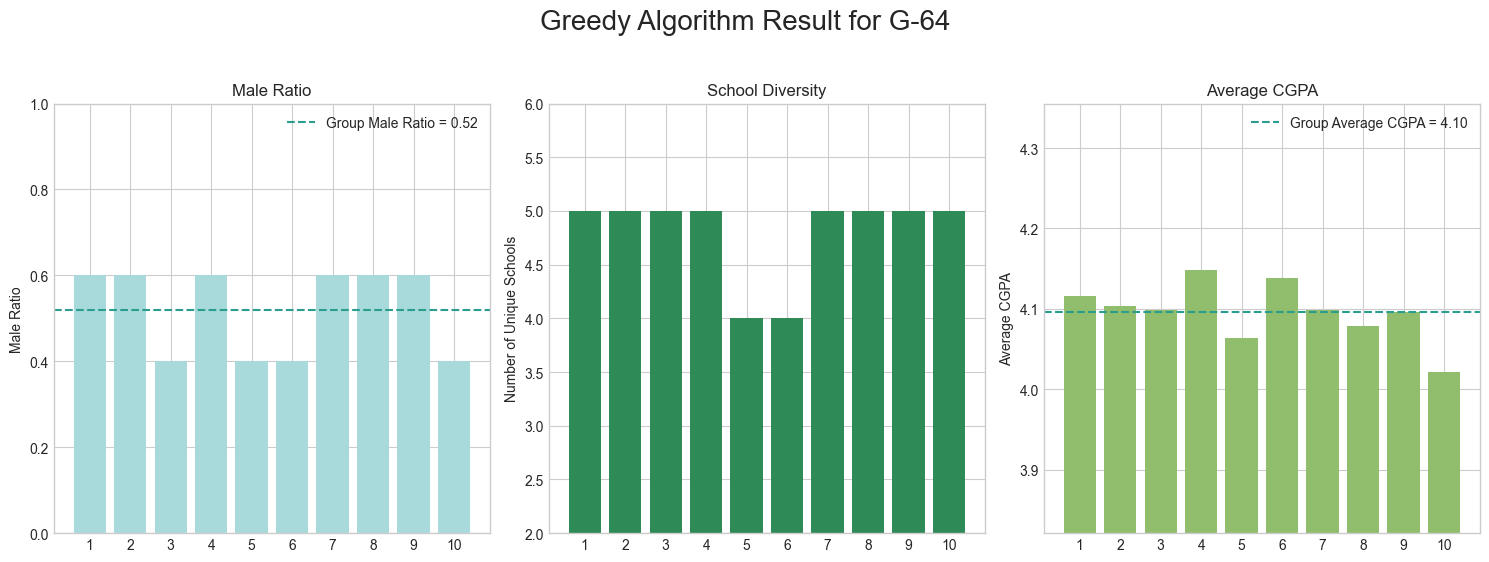

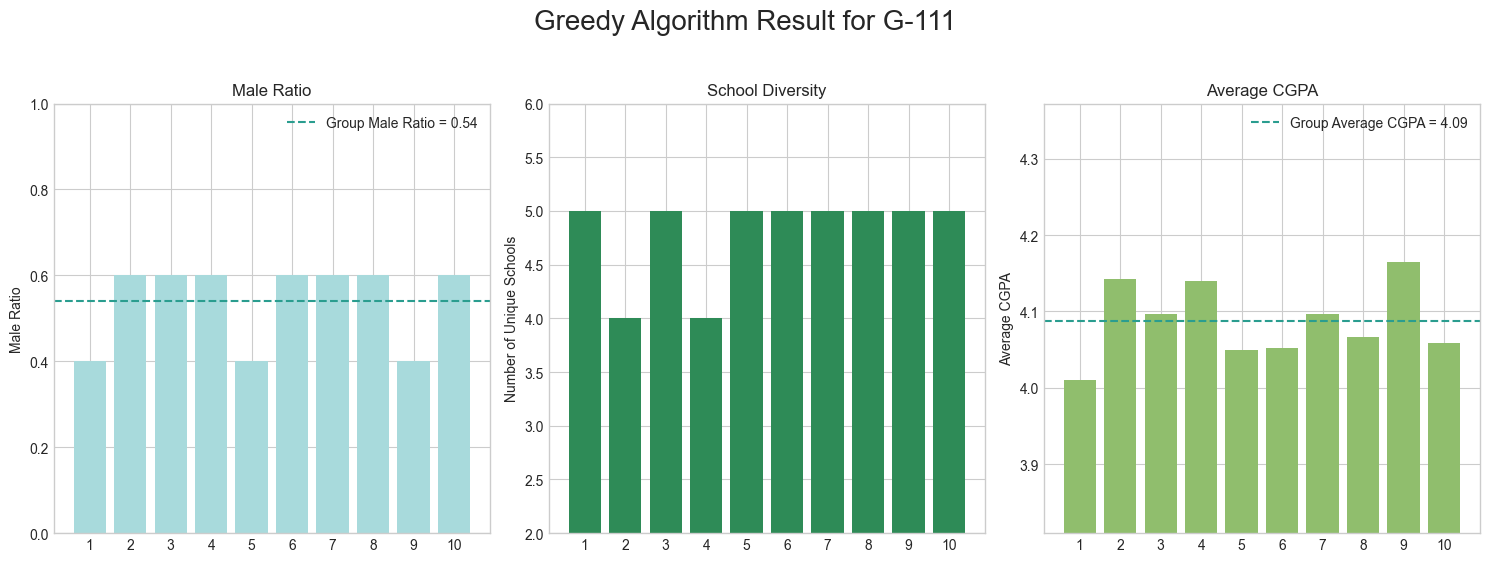

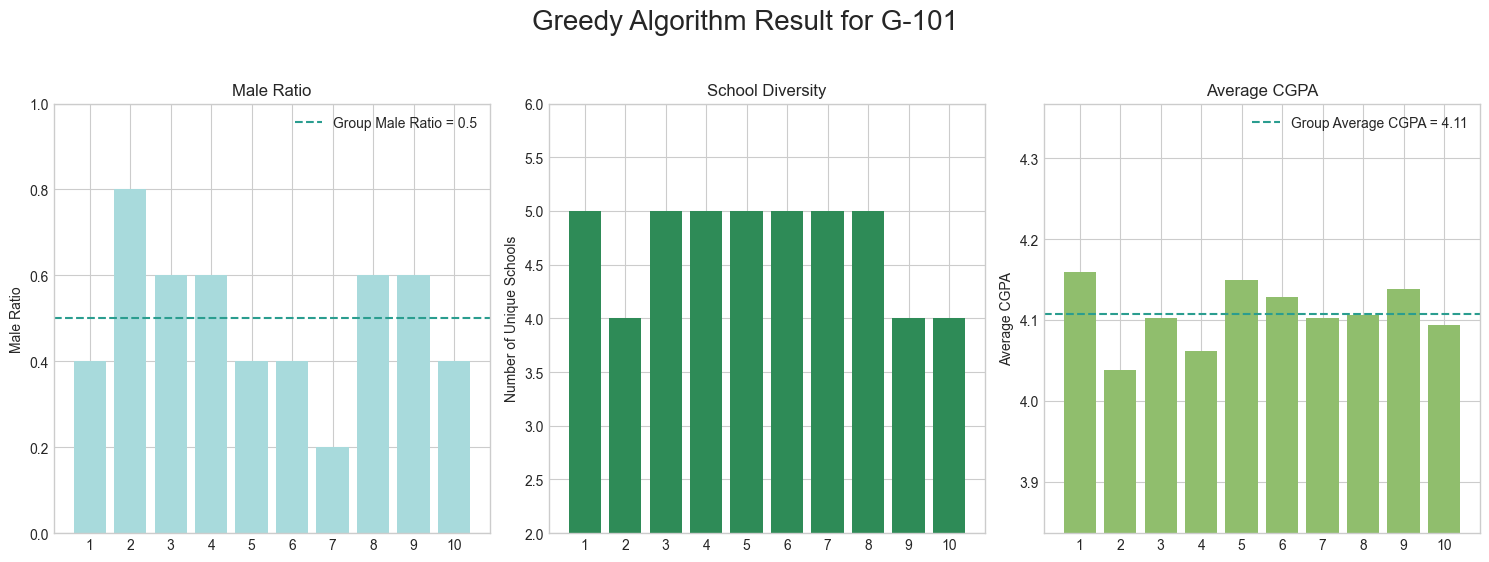

In [15]:
# TEST: try implement the greedy algorithm and graph ploting by Randomly select three groups
# initialize the dataset
random.seed(RANDOM_SEED)
dataset = read_csv("assets/records.csv")
calc_ratio_dataset(dataset)
calc_weights(dataset)
tg_list = [t for t in dataset.values()]
# randomly selecte 3 groups
random_tg = random.sample(tg_list, 3)
for tg in random_tg:
    stratified_grouping(tg, group_size=5, number_of_groups=10)
    plot_group_distribution(tg)

Expected result:

<img src="assets\greedy_res_1.png" width="25%">
<img src="assets\greedy_res_2.png" width="25%">
<img src="assets\greedy_res_3.png" width="25%"> 

### 6.4 Analysis & Reflection
For the first and second group, the results seem acceptable. However, for the third groups, this algorithm behave extremly badly on Gender and CGPA valuation. Perhaps the result is shackled by an **local optima** and cannot escape automatically. 

Thus, the greedy algorithm is not an ideal method to grouping those 6000 students, and we should optimize it. Since every step is optimal, but the result is not optimal, can **accepting some bad situations** in the process make the result better?

# 7. Simulated Annealing

### 7.1 Principle
According to Kirkpatrick et al. (1983), **simulated annealing** is inspired by the physical process of metal annealing. Atoms in a metal initially reside at positions where their internal energy is at a local minimum. Upon heating, the atoms' energy increases, causing them to leave their original positions and randomly move to other locations. The slow cooling process during annealing allows atoms a greater chance of finding positions with even lower internal energy than before (Wikipedia, 2025).

Similarly, our grouping situation is currently in an unbalanced "high-energy" state. To achieve a more ideal "low-energy" state, we need to simulate the metal annealing process, **allowing some students to be moved to groups less suitable for them** during the "cooling" process. In the long run, from a holistic perspective, the overall result will move away from local optima and towards global optima.

*Computational Thinking: Abstraction, Algorithm Design*

### 7.2 Implementation

The simulated annealing process can be devided into 5 steps:
1. Randomly choose 2 students and swap them
2. re-calculate the score of team
3. compare the score after swaping with the previous score
    - if score is lower, then accept this shift
    - if score is higher, then accept this shift with a certain probability.
        - This **acceptance probability** is correlated with the number of iterations (related to **temperature**)
        - Kirkpatrick et al. (1983) set the **acceptance probability** as $e^{\frac{\Delta E}{T}}$, and we use it too
4. After exchange for a certain times, lower the temperature
5. Repeat until reach the max iteration times or not accept any shift for certain times.
 
*Computational Thinking: Abstraction, Decomposition*

### 7.3 Annealing schedule
**Annealing schedule** is about how to initialize and modify the temperature.

Kirkpatrick et al. (1983) emphasized that: 
> “The simulated annealing process consists of first ‘melting’ the system being optimized at a **high effective temperature**, then **lowering the temperature by slow stages** until the system ‘freezes’ and no further changes occur. At each temperature, the simulation must **proceed long enough** for the system to reach a steady state.”

The paper also points out that their temperature reduction strategy is $T_{i+1} = \alpha T_{i}$, where $\alpha$ is the cooling rate, a constant between 0 and 1.

Therefore, we set the **annealing schedule** as follows:
- Initial temperature: 100
- Ending temperature: 0.01
- Maximum number of cycles: 1000 * number of groups
- Maximum number of allowed non-swap cycles: 50
- Cooling rate: tentatively set at 0.98
- Cooling method: Every (number of groups) iterations, the temperature is reduced once according to $T_{i+1} = \alpha T_{i}$.
    - That is because the more groups we have, the more possibilities to exchange two students, thus more iterations are needed under one temperature. 

*Computational Thinking: Decomposition*

### 7.4 Cooling rate

**Cooling rate** is a crucial hyperparameter, and before the experiment, no one could predict a suitable value.
- If the value is too large, the annealing process will be very slow, preventing the data from truly cooling down within the maximum number of iterations.
- If the value is too small, the temperature will drop rapidly. Insufficient cooling and lack of student interaction will not lead to better results.

Therefore, just to be on the safe side, we temporarily set it to 0.98. At the end of this report, we will try multiple cooling rates to find the most suitable one.

*Computational Thinking: Decomposition*

### 7.5 Pseudocode
```
FUNCTION annealing(TutorialGroup, number of groups, initial temperature, cooling rate, min temperature, max iterations, max no changing times, method):  
    INITIALIZE temperature, iteration, no_change_count:
    WHILE temperature > min temperature AND iteration < max iterations*number of groups AND no_change_count < max no changing times:
        REPEAT number of groups times:
            RANDOM SELECT 2 students
            RECORD previous score
            EXCHANGE 2 student
            RECORD current score
            CALCULATE change of score
            IF change of score is accepted:
                SET max_no_change to 0
                UPDATE group score
            ELSE:
                INCREASE no_change_count by 1
                EXCHANGE 2 student back
        LOWER temperature
```

In [16]:
# randomly selecte two students from two random groups
def select_two(cur_groups:dict[int:Group]):
    groups = [gp for gp in cur_groups.values()]
    group1, group2 = random.sample(groups, 2)
    student_idx1 = random.randint(0, len(group1.groupmate)-1)
    student_idx2 = random.randint(0, len(group2.groupmate)-1)
    return group1, group2, student_idx1, student_idx2

# swap two students accoring to their index in group 
def exchange_two(group1:Group, group2:Group, student_idx1:int, student_idx2:int):
    student_1, student_2 = group1.groupmate[student_idx1],group2.groupmate[student_idx2] 
    student_1.group_num, student_2.group_num = student_2.group_num, student_1.group_num
    group2.groupmate[student_idx2],group1.groupmate[student_idx1] = student_1, student_2

def accept_change(delta,temperature)->bool: 
    if delta > 0:
        return True 
    else:
        p = math.exp(delta/temperature)
        return random.random() < p   # a certain chance of acceptance for bad result.

def annealing(tutorialgroup:TutorialGroup, number_of_groups, initial_temp=100, cooling_rate=0.98, min_temp=0.01, max_iter=1000, max_no_change=50, method="entropy"):
    temperature = initial_temp
    iteration = 0 
    no_change_count = 0  # calculate the number of times the condition is not accepted after consecutive swaps.

    while temperature > min_temp and iteration < max_iter*number_of_groups and no_change_count < max_no_change:
        for _ in range(number_of_groups):
            iteration += 1
            group1, group2, student_idx1, student_idx2 = select_two(tutorialgroup.groups)
            previous_score_1 = group1.score
            previous_score_2 = group2.score
            previous_score = previous_score_1 + previous_score_2
            exchange_two(group1, group2, student_idx1, student_idx2) # swap
            cur_score_1 = calc_score(group1.groupmate, tutorialgroup, method)
            cur_score_2 = calc_score(group2.groupmate, tutorialgroup, method)
            new_score = cur_score_1 + cur_score_2
            delta = previous_score - new_score 
            if accept_change(delta, temperature):
                no_change_count = 0
                # update score
                group1.score, group2.score = cur_score_1, cur_score_2
            else:
                no_change_count += 1
                # swap them back
                exchange_two(group1, group2, student_idx1, student_idx2)
        temperature *= cooling_rate  # cooling down
    calc_ratio_groups(tutorialgroup.groups)

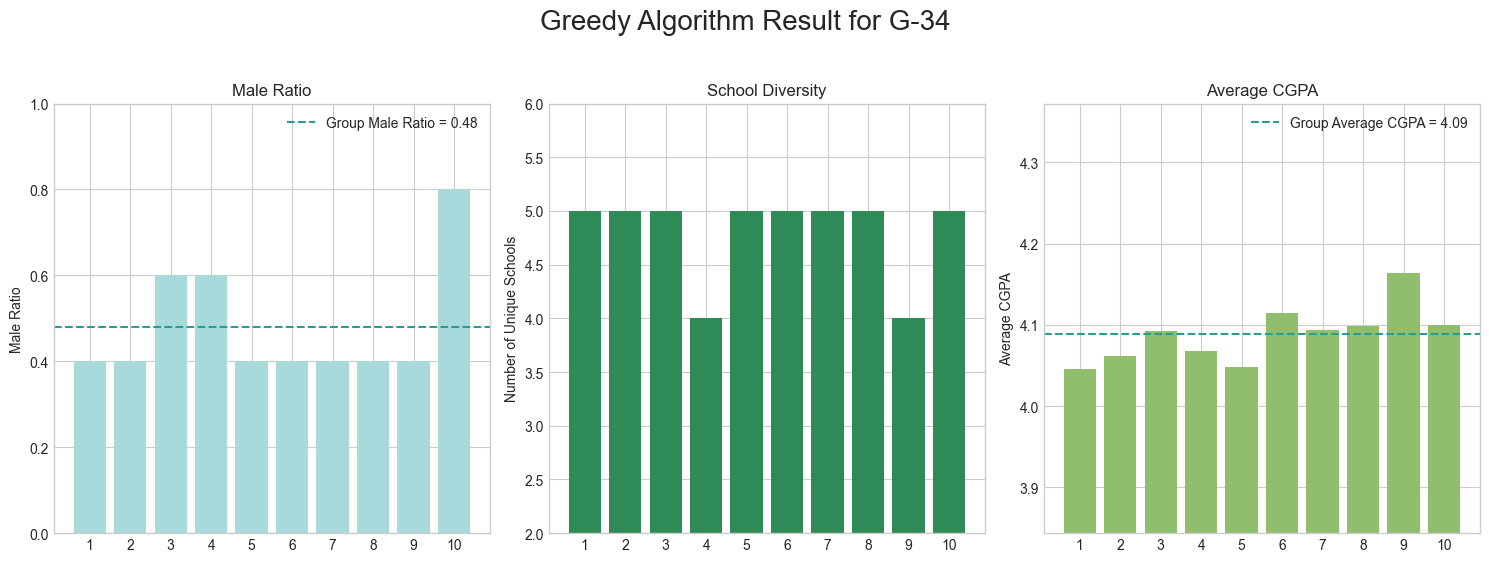

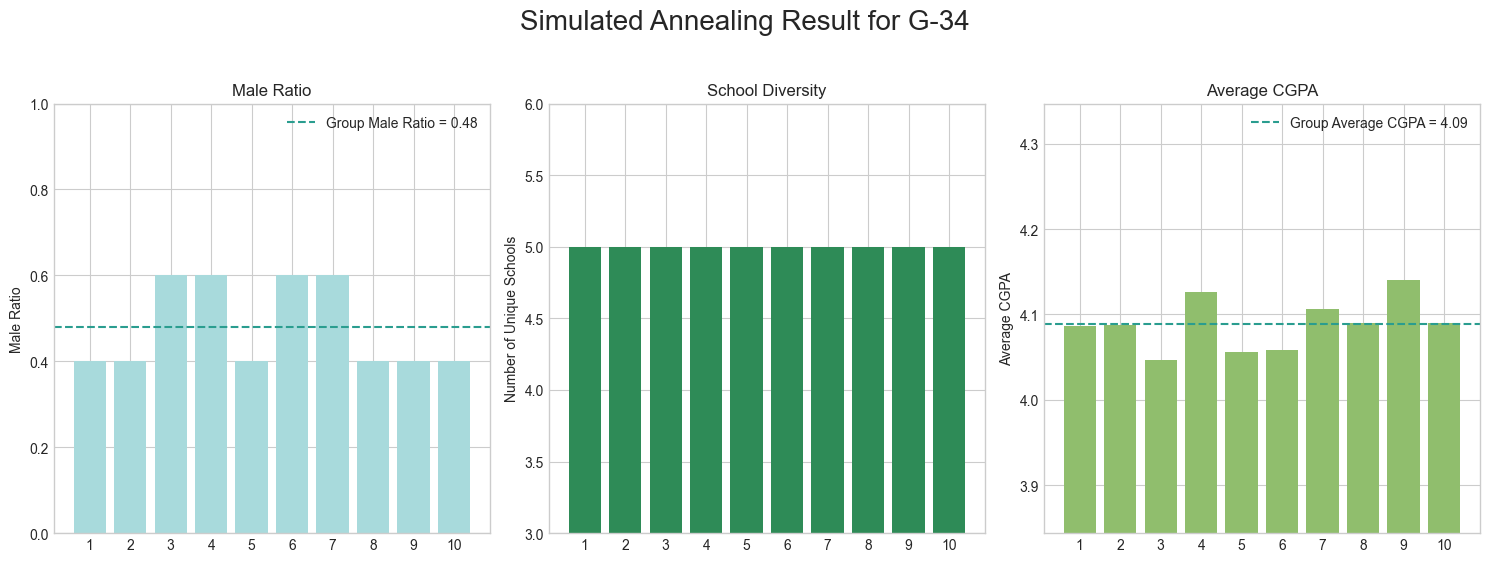

In [17]:
# TEST: if the simulate annealing works well.
random.seed(RANDOM_SEED)
dataset = read_csv("assets/records.csv")
calc_ratio_dataset(dataset)
calc_weights(dataset)
tg = dataset["G-34"]
stratified_grouping(tg, group_size=5, number_of_groups=10,method="entropy")
plot_group_distribution(tg)
annealing(
    tutorialgroup = tg,
    number_of_groups = 10,
    method = "entropy"
    )
plot_group_distribution(tg, title="Simulated Annealing Result")

Expected result:

<img src="assets\greedy_res_34.png" width="25%">
<img src="assets\anneal_res_34.png" width="25%">


### 7.6 Analysis & Reflection

For G-34, simulate annealing makes a great imporvement. It eliminate the extremly high male ratio for team 10, and also allocate each group of students without coming from a same school. Also, it lowers the gap of mean CGPA between teams. 

At least for this group, **simulated annealing** has a significant optimization effect, truly helping the grouped results escape the constraints of local optima. We will compare the overall optimization results later.

### 7.7 Preparation for Entire Result Visualization

The code below plots the final grouping results as a heatmap.

The heatmap has 120 squares, each representing a Tutorial Group.
- The squares have numbers and colors.
    - The numbers represent the ratio of the number of **qualifying teams** in the tutorial group to the total number of teams.
        - **if a team is qualified, it means**:
            1. Gender Ratio: must within ±1 of the group average
            2. School Distribution: Team's GS must not less than Tutorial Group's GS * 0.75
            3. CGPA Distribution: must within the range of the average * (0.97~1.03)
    - The larger the number and the darker the color, the better the grouping of the Tutorial Group.
- Overall,
    - The darker the overall color, the better the overall grouping.
    - The more balanced the overall color, the stronger the algorithm's general applicability.

The overall analysis of result will present in the end.

*Computational Thinking: Abstraction, Decomposition*

In [18]:
# plot the heatmap to visualize final result
def calc_qualified_num(dataset, number_of_groups):
    gender_list = []
    school_list = []
    cgpa_list = []
    tg_num = len(dataset)
    row_num = 10
    col_num = tg_num // row_num

    for tutorialgroup in dataset.values():
        gp_male_ratio = tutorialgroup.male_ratio
        gp_avg_cgpa = tutorialgroup.avg_cgpa
        tutorial_group_gs = calc_school_gini_simpson_index(tutorialgroup.schools_ratio)

        qualified_gender = 0
        qualified_school = 0
        qualified_cgpa = 0
        for group in tutorialgroup.groups.values():
            gp_size = group.size
            group_gs = calc_school_gini_simpson_index(group.school_ratio)
            if gp_male_ratio - 1/gp_size <= group.male_ratio <= gp_male_ratio + 1/gp_size:
                qualified_gender += 1
            if group_gs >= 0.75 * tutorial_group_gs:
                qualified_school += 1
            if gp_avg_cgpa * 0.97 <= group.avg_cgpa <= gp_avg_cgpa * 1.03:
                qualified_cgpa += 1
        gender_list.append(qualified_gender / number_of_groups)
        school_list.append(qualified_school / number_of_groups)
        cgpa_list.append(qualified_cgpa / number_of_groups)

    # reshape vector to matrix
    gender_matrix = [gender_list[col_num*i:col_num*i+row_num] for i in range(row_num)]
    school_matrix = [school_list[col_num*i:col_num*i+row_num] for i in range(row_num)]
    cgpa_matrix = [cgpa_list[col_num*i:col_num*i+row_num] for i in range(row_num)]
    return gender_matrix, school_matrix, cgpa_matrix

def plot_single_heatmap(axis, matrix, title):
    sns.heatmap(matrix, ax=axis, cmap="YlGn", annot=True, fmt=".1f", vmin=0, vmax=1)
    axis.set_title(title, fontsize=16)
    axis.set_xticks([])
    axis.set_yticks([])

def plot_all_heatmap(gender_matrix, school_matrix, cgpa_matrix, main_title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'Ratio of Qualified Groups ({main_title})', fontsize=20)
    plot_single_heatmap(axes[0], gender_matrix, "Gender")
    plot_single_heatmap(axes[1], school_matrix, "School")
    plot_single_heatmap(axes[2], cgpa_matrix, "CGPA")
    plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])

def judge_the_result(dataset, number_of_groups,main_title):
    gender_matrix, school_matrix, cgpa_matrix = calc_qualified_num(dataset, number_of_groups)
    plot_all_heatmap(gender_matrix, school_matrix, cgpa_matrix, main_title)

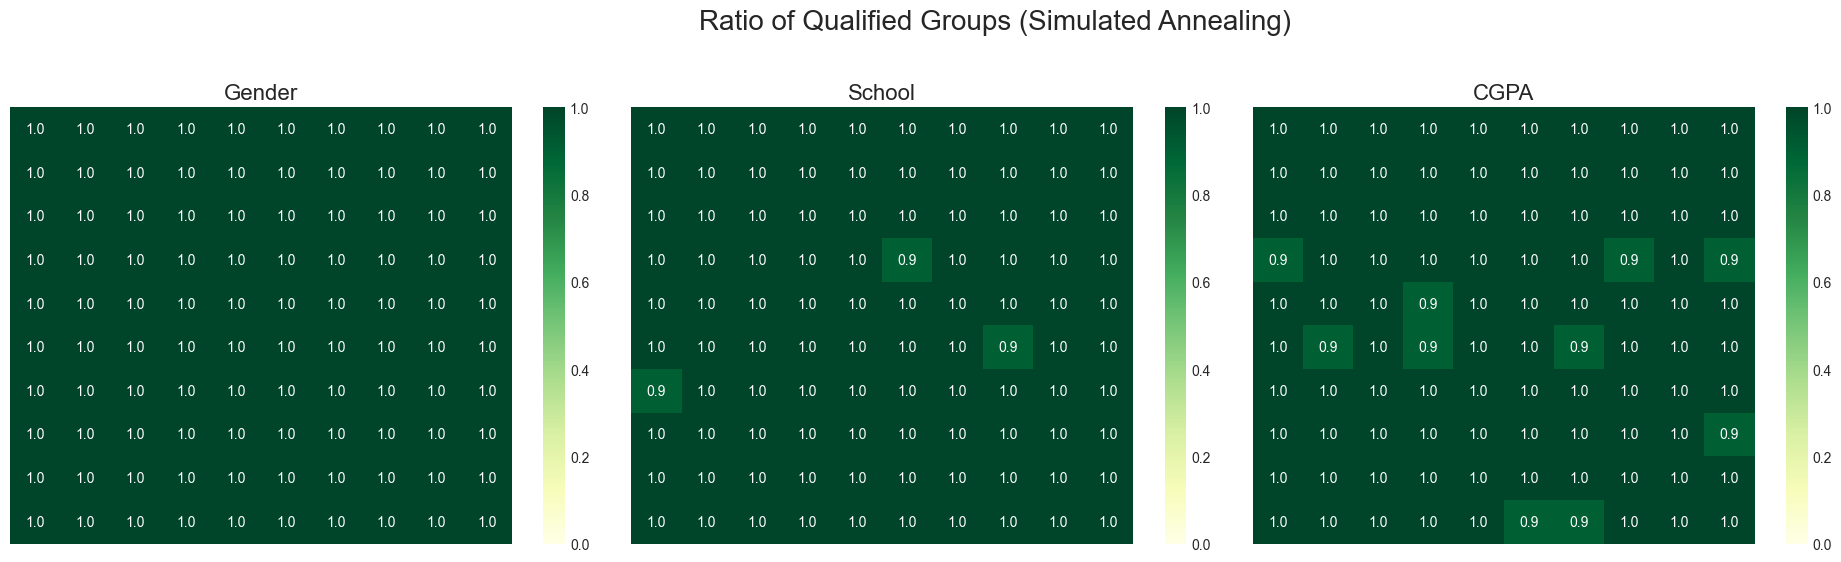

In [19]:
# TEST: if the heatmap ploting function runs well. It takes about 3~4 seconds to run this cell. 
random.seed(RANDOM_SEED)
group_size, number_of_groups = 5, 10
dataset = read_csv("assets/records.csv")
calc_ratio_dataset(dataset)
calc_weights(dataset)
for gp_id, tutorialgroup in dataset.items():
    stratified_grouping(
        tutorialgroup = tutorialgroup,
        group_size = group_size,
        number_of_groups = number_of_groups,
        )
for gp_id, tutorialgroup in dataset.items():
    annealing(
        tutorialgroup = tutorialgroup,
        number_of_groups = number_of_groups,
        )

judge_the_result(dataset, number_of_groups, f"Simulated Annealing")

Expected result:

<img src="assets\heatmap_test.png" width="50%">

What a **FANTASTIC** result!!! We haven't even seriously adjusted those parameters yet.

# 8. Data Export & Main Program Construction

We have already written the functions for each step; now we just need to put them together like building blocks to get the final main program.

*Computational Thinking: Algorithm Design*

In [20]:
# export the result
def write_csv(dataset, path):
    with open(path,"w",newline = '',encoding="utf-8") as f:
        writer = csv.writer(f)
        header = ['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'CGPA', 'Team Assigned']
        writer.writerow(header)
        for tutorialgroup_id, tutorialgroup in dataset.items():
            for student in tutorialgroup.groupmate:
                row = [tutorialgroup_id, student.student_id, student.school, student.name, student.gender, student.cgpa, student.group_num]
                writer.writerow(row)

def ask_for_input(use_defalut_value=True):
    if use_defalut_value: 
        return 5, 10
    valid_input = False
    group_size = 0
    while not (4 <= group_size <= 10) or not valid_input:
        try:
            print("Please enter the Group size: ")
            group_size = int(input())
            valid_input = True
            if not (4 <= group_size <= 10):
                print("Invalid Input. Please enter a integer between 4 and 10.")
        except:
            print("Invalid Input. Please enter a integer between 4 and 10.")
    number_of_groups = GP_SIZE // group_size
    return group_size, number_of_groups

# main program
def main(random_seed=RANDOM_SEED, cooling_rate=0.98,method="entropy",show_plot=(False, False), output=True, use_defalut_value=True):
    random.seed(random_seed)
    group_size, number_of_groups = ask_for_input(use_defalut_value)

    tic = time.time()
    dataset = read_csv("assets/records.csv")
    calc_ratio_dataset(dataset)
    calc_weights(dataset)
    toc = time.time()
    prepare_runtime = toc - tic
    print(f"Complete data loading, runtime = {prepare_runtime:.6f}s")

    tic = time.time()
    for gp_id, tutorialgroup in dataset.items():
        stratified_grouping(
            tutorialgroup = tutorialgroup,
            group_size = group_size,
            number_of_groups = number_of_groups,
            method = method
            )
    toc = time.time()
    greedy_runtime = toc - tic
    print(f"Complete greedy algorithm, runtime = {greedy_runtime:.6f}s")
    if show_plot[0]:
        judge_the_result(dataset, number_of_groups, f"Greedy Algorithm + {method} weights")

    tic = time.time()
    for gp_id, tutorialgroup in dataset.items():
        annealing(
            tutorialgroup = tutorialgroup,
            number_of_groups = number_of_groups,
            cooling_rate = cooling_rate,
            method = method
            )
    toc = time.time()
    anneal_runtime = toc - tic
    print(f"Complete simulate annealing, runtime = {anneal_runtime:.6f}s")
    if show_plot[1]:
        judge_the_result(dataset, number_of_groups, f"Simulated Annealing + {method} weights")

    if output:
        write_csv(dataset, path="assets/output.csv")
    print(f"Finished! Total runtime = {anneal_runtime+greedy_runtime+prepare_runtime:.6f}s")
    print()

# 9. Algorithm Judgement and Selection

The design of the algorithm described above is **entirely driven by the "problem" itself**; every function and every step is designed to solve the problem. 

However, as we mentioned when analyzing greedy algorithms: **does using the optimal solution at every step guarantee a globally optimal solution? Not necessarily.** After solving the problem, we should calmly step outside the local perspective and return to the global perspective to evaluate the algorithm's true effectiveness.


### 9.1 Select the best algorithm

We selected three different algorithms for comparison:
1. Random grouping
2. Greedy algorithm grouping only
3. Greedy algorithm + simulated annealing grouping

6000 students will be grouped according to these three algorithms respectively, and the results will be plotted using a heatmap.

*Computational Thinking: Abstraction, Algorithm Design*

In [21]:
def random_grouping(random_seed, group_size, number_of_groups,show_plot=False):
    random.seed(random_seed)
    dataset = read_csv("assets/records.csv")
    calc_ratio_dataset(dataset)
    for tutorialgroup in dataset.values():
        count = 0
        for i in range(number_of_groups):
            rest_student = [st for st in tutorialgroup.groupmate if st.group_num != -1]
            # randomly selecting students
            random_list = random.sample(tutorialgroup.groupmate, group_size)
            for student in random_list:
                student.group_num = i+1
            group = Group(i+1)
            group.groupmate = [st for st in random_list]
            count += group_size
            tutorialgroup.groups[i+1] = group
        # if some students haven't been grouped, randomly allocate them
        if count < tutorialgroup.size:
            randomlist = random.sample(range(1, number_of_groups+1), tutorialgroup.size-count)
            rest_student = [st for st in tutorialgroup.groupmate if st.group_num != -1]
            for i in range(count, tutorialgroup.size):
                cur_group = tutorialgroup.groups[randomlist[i-count]]
                student = rest_student[i-count]
                student.group_num = randomlist[i-count]
                cur_group.groupmate.append(student)
        calc_ratio_groups(tutorialgroup.groups)
    if show_plot:
        judge_the_result(dataset, number_of_groups, "Random Grouping")

Complete data loading, runtime = 0.012139s
Complete greedy algorithm, runtime = 0.057188s
Complete simulate annealing, runtime = 2.621011s
Finished! Total runtime = 2.690339s



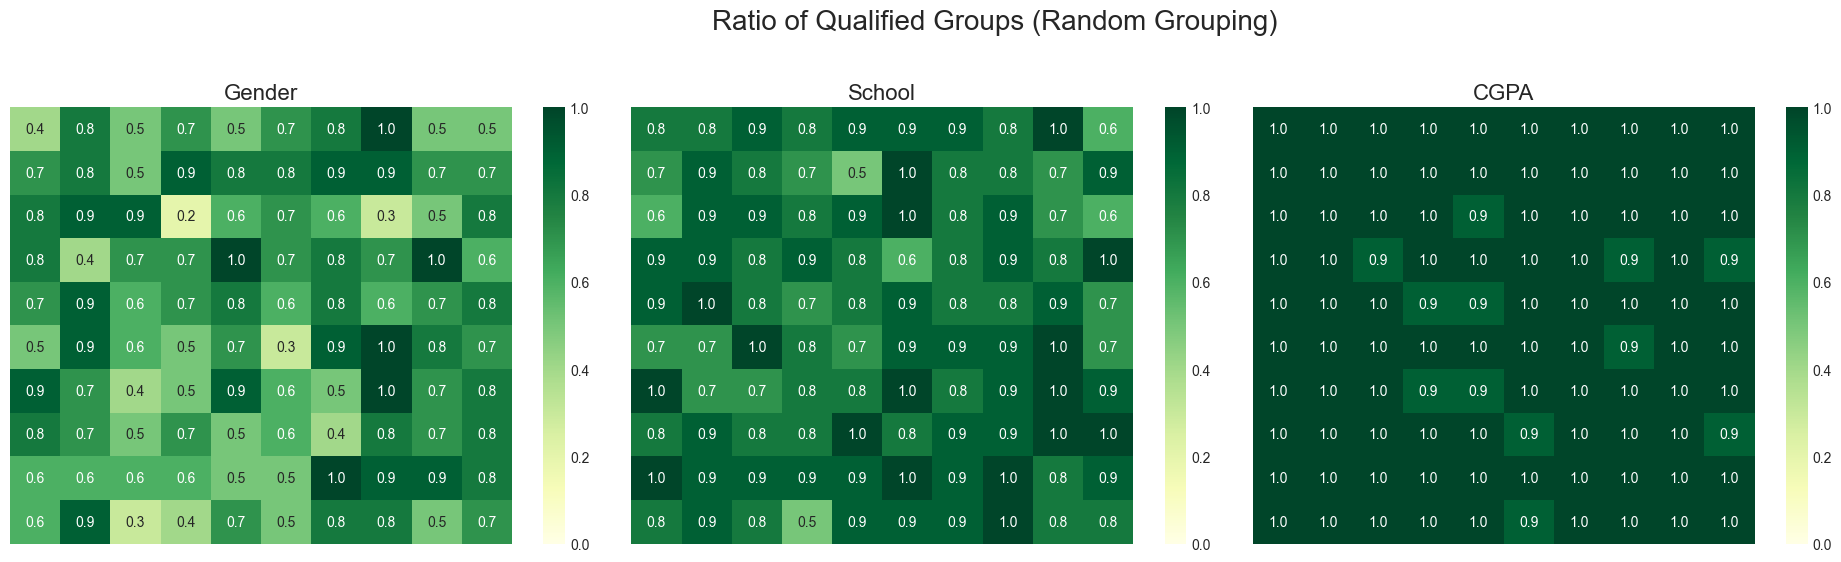

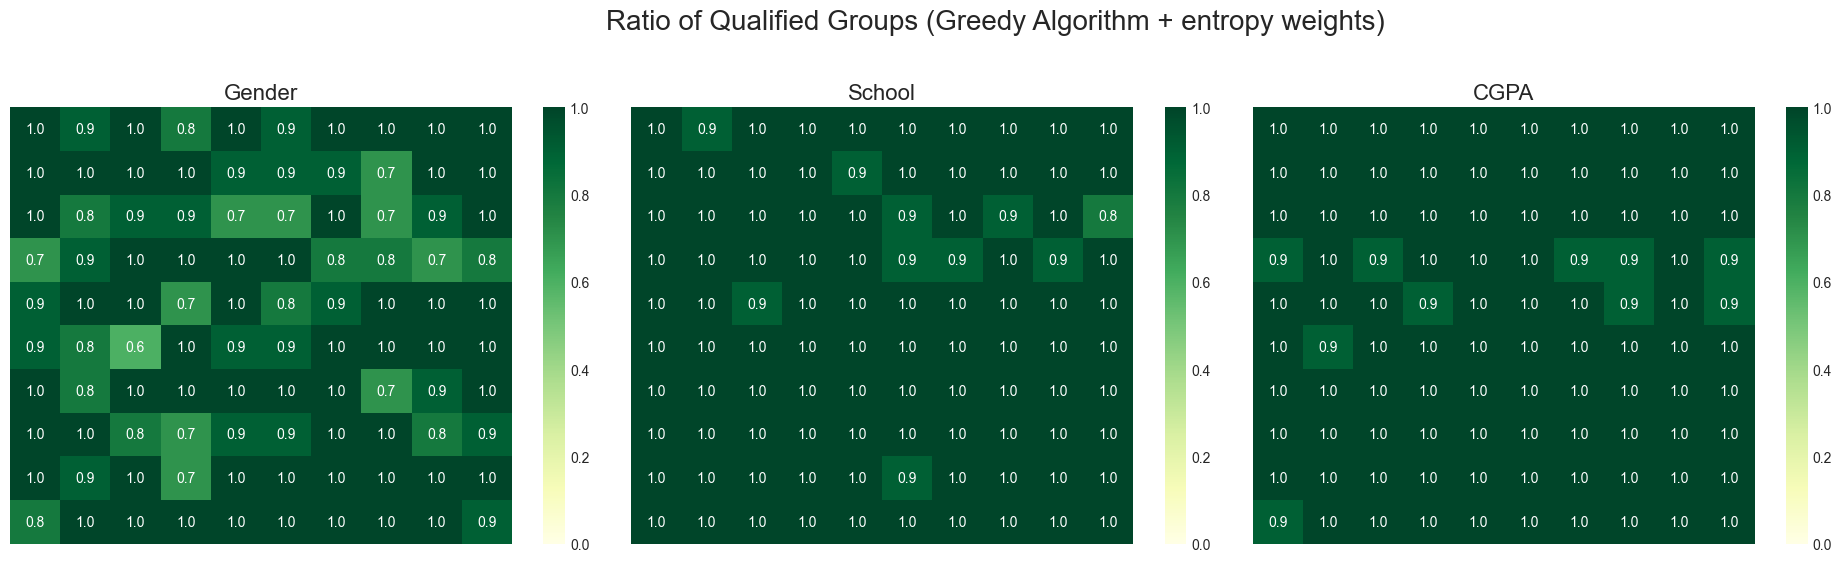

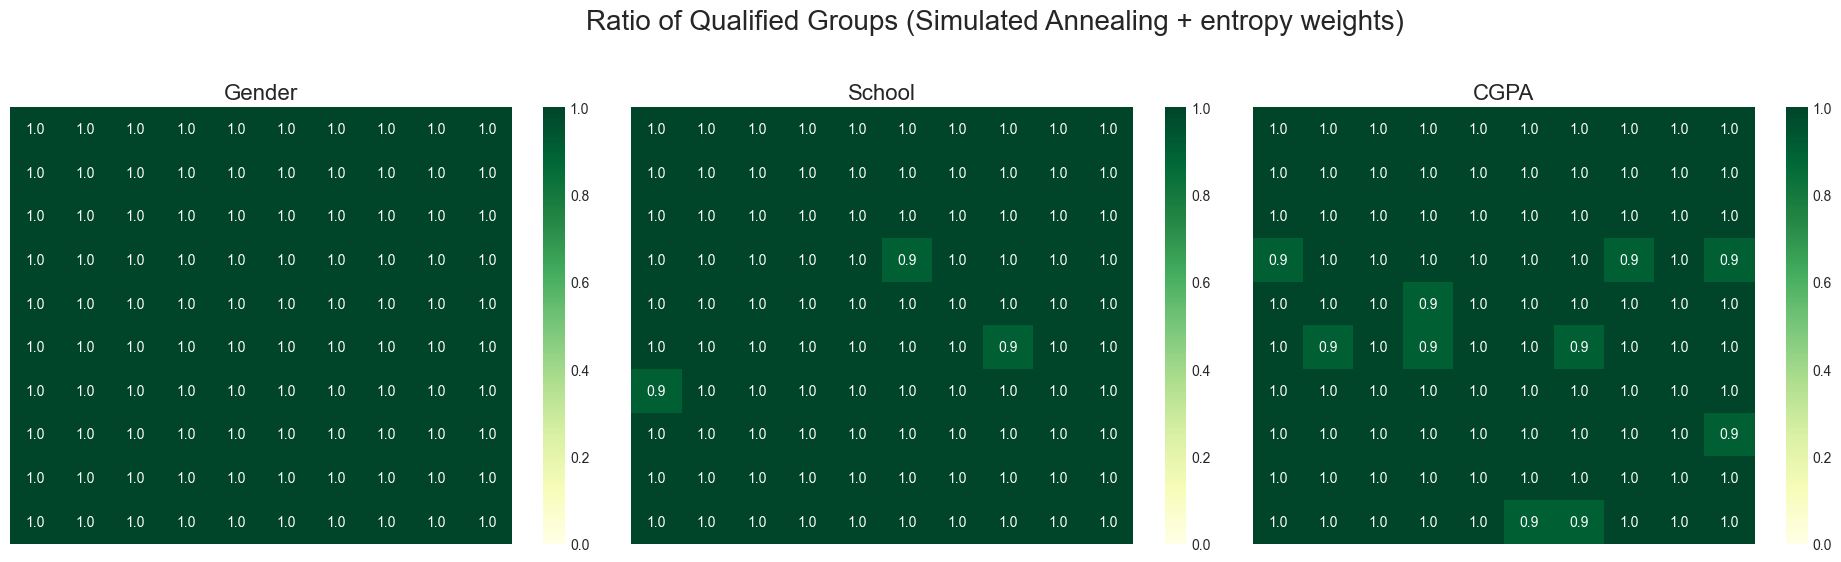

In [22]:
# random grouping
random_grouping(RANDOM_SEED, 5, 10, show_plot=True)
# greedy & greedy + simulate annealing
main(show_plot=(True,True), output=False)

Expected result:

<img src="assets\selection_random.png" width="25%">
<img src="assets\selection_greedy.png" width="25%">
<img src="assets\selection_simulate.png" width="25%">

Evidently, according to those heatmaps:
- The random grouping algorithm returns a mix of colors, which connote a bad performance
- The greedy algorithm returns a mix of colors, but better than the former one
- The greedy + simulate annealing algorithm retruns almost all dark green blocks, which means its performance is the best

Thus, after comparison, we choose **greedy + simulate annealing** algorithm as our final algorithm.

### 9.2 Select the best weights

We set four weights:
- Entropy weight
- School-biased weight
- CGPA-biased weight
- Gender-biased weight

We calculated scores using each weight, grouped them using our chosen algorithm, and finally plotted a heatmap.

*Computational Thinking: Abstraction, Algorithm Design*

Complete data loading, runtime = 0.015419s
Complete greedy algorithm, runtime = 0.057505s
Complete simulate annealing, runtime = 2.609560s
Finished! Total runtime = 2.682484s

Complete data loading, runtime = 0.015896s
Complete greedy algorithm, runtime = 0.068921s
Complete simulate annealing, runtime = 2.635408s
Finished! Total runtime = 2.720226s

Complete data loading, runtime = 0.014740s
Complete greedy algorithm, runtime = 0.057770s
Complete simulate annealing, runtime = 2.639829s
Finished! Total runtime = 2.712339s

Complete data loading, runtime = 0.016029s
Complete greedy algorithm, runtime = 0.049994s
Complete simulate annealing, runtime = 2.594333s
Finished! Total runtime = 2.660356s



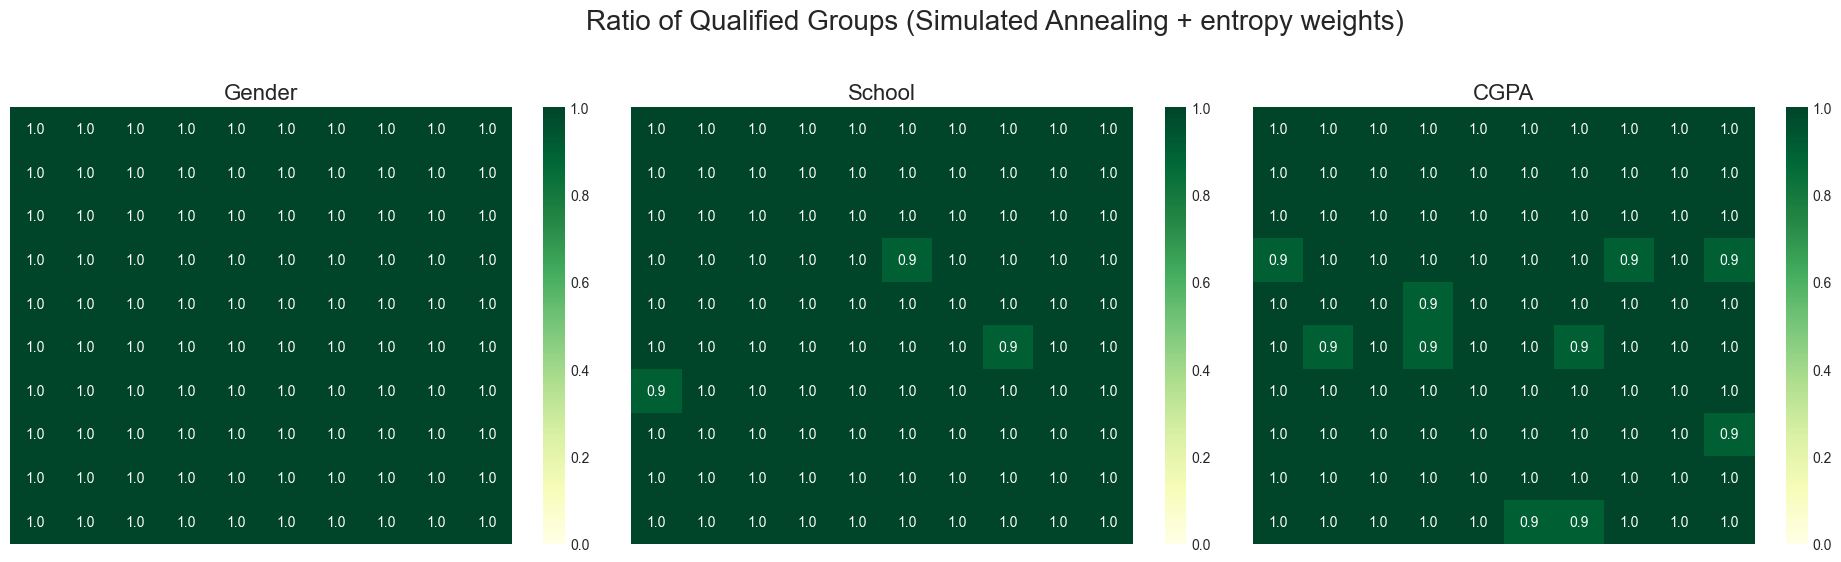

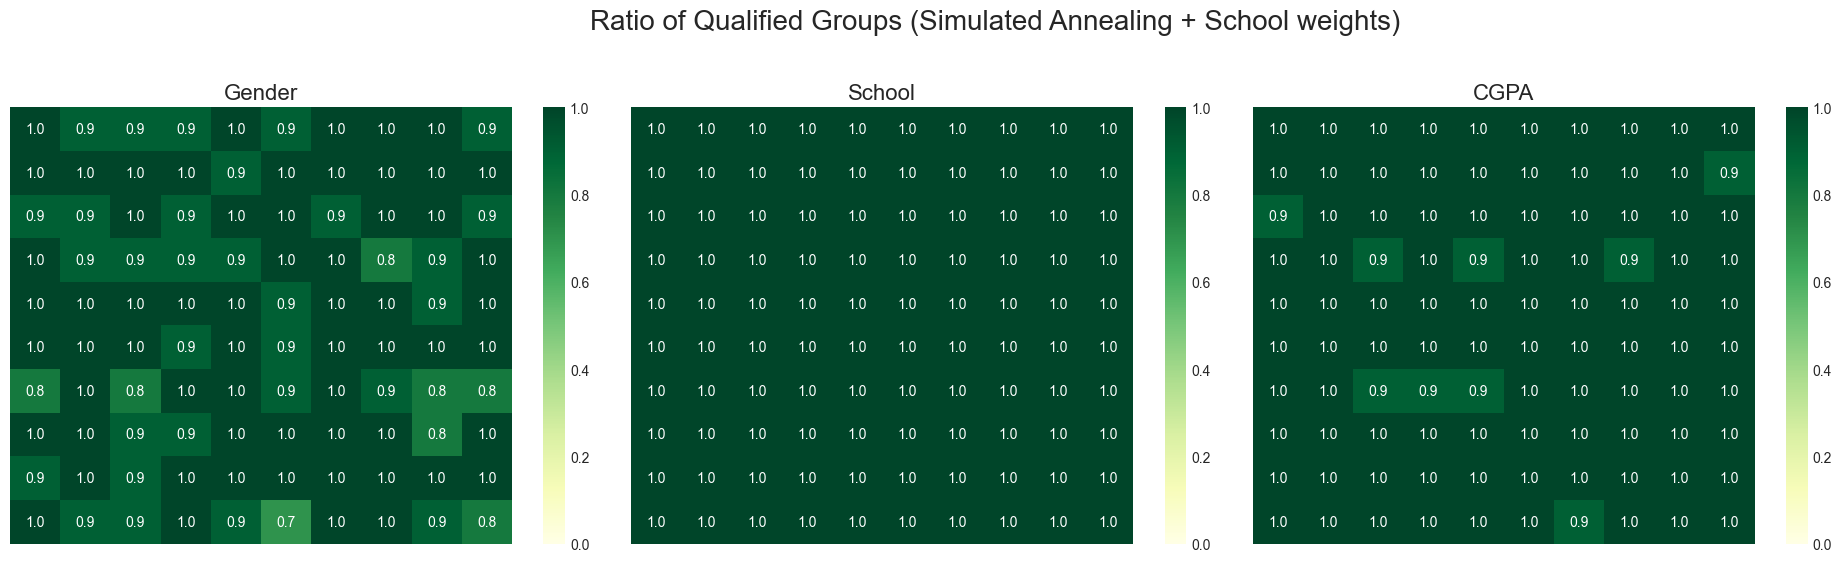

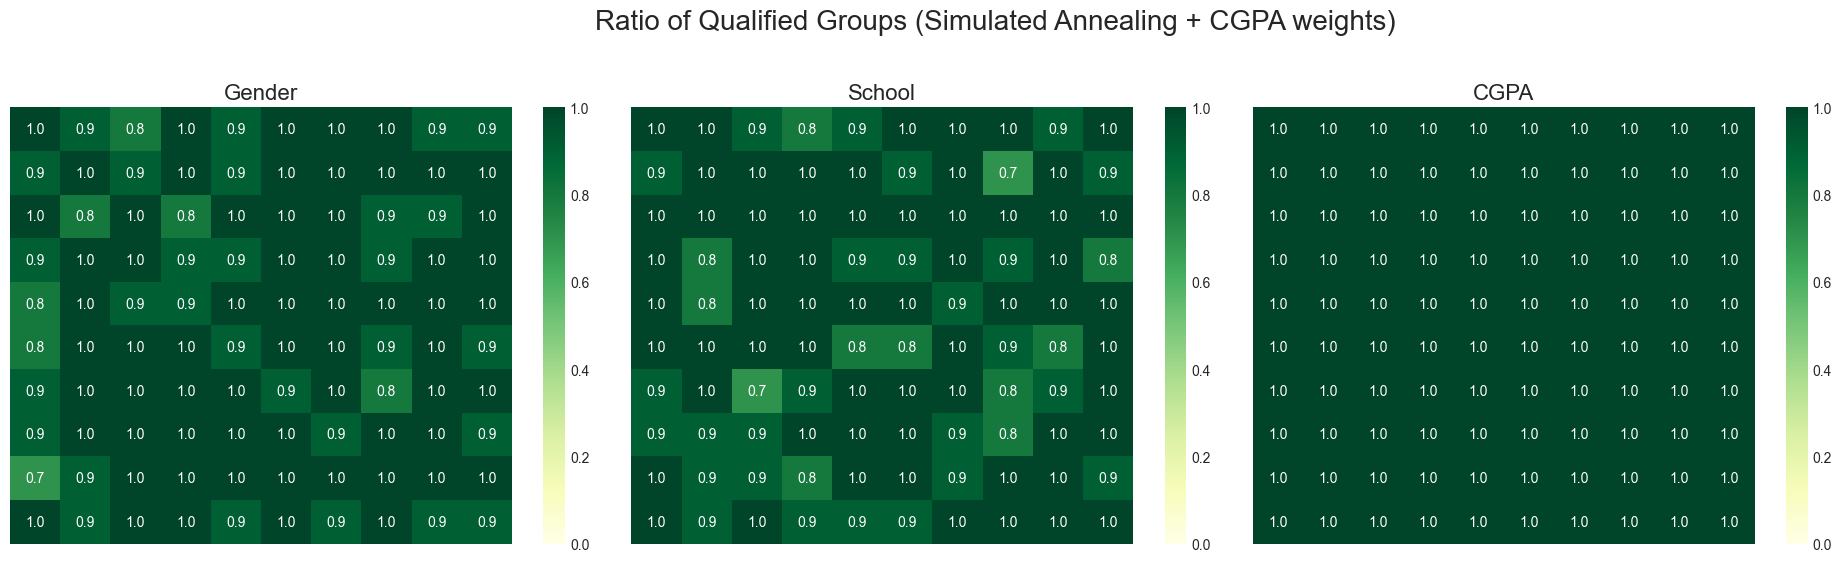

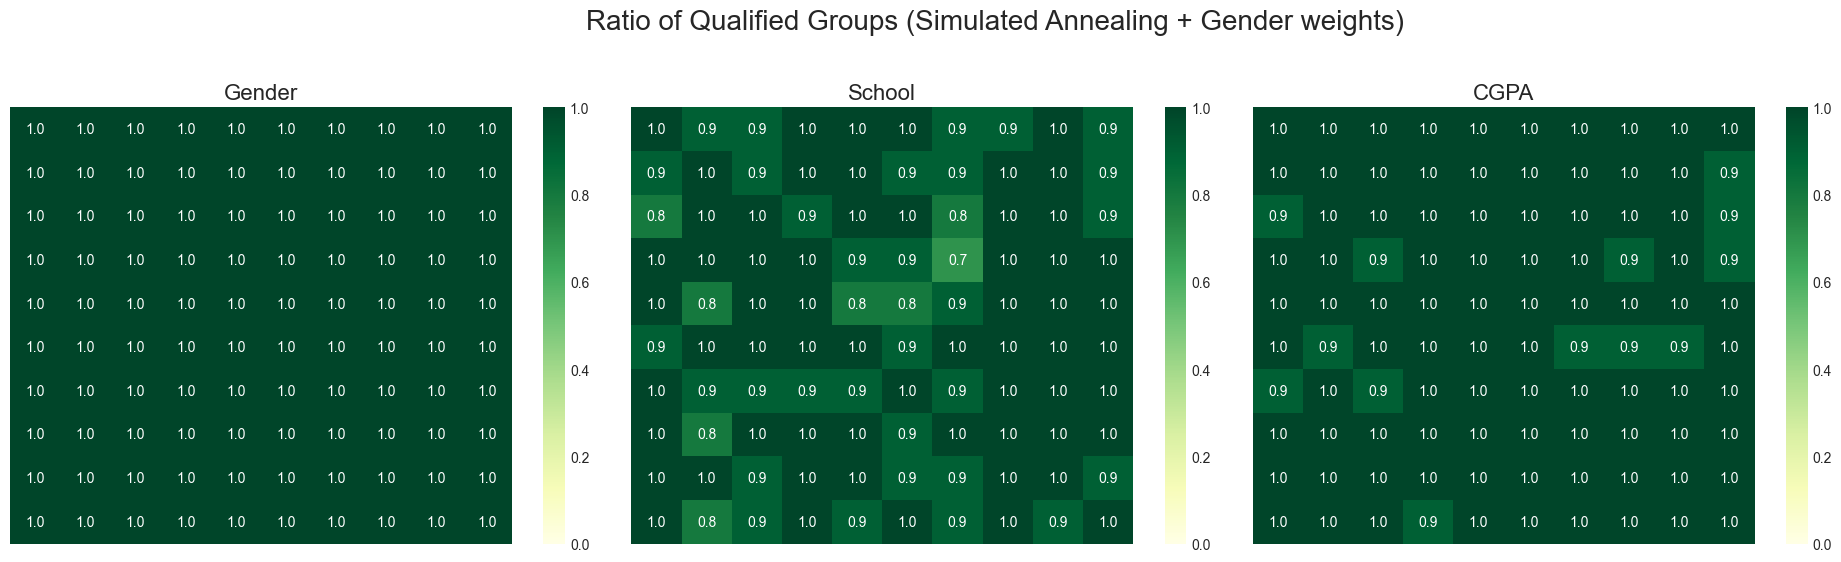

In [23]:
main(method="entropy",show_plot=(False,True), output=False)
main(method="School",show_plot=(False,True), output=False)
main(method="CGPA",show_plot=(False,True), output=False)
main(method="Gender",show_plot=(False,True), output=False)

Expected result:

<img src="assets\weight_entropy.png" width="35%">
<img src="assets\weight_school.png" width="35%">
<div></div>
<img src="assets\weight_cgpa.png" width="35%">
<img src="assets\weight_gender.png" width="35%">

Clearly, weights with bias will **achieve excellent grouping results in the areas they favor, but perform poorly in others**. Entropy weights, on the other hand, **comprehensively considers all factors**, yielding the most balanced and high-quality grouping results.

Therefore, for score calculation, we choose **entropy weights**.

### 9.3 Hyperparameter Tuning

After confirming the scoring method and grouping algorithm, we need to **tune the algorithm's hyperparameters** -- specifically, the simulated annealing hyperparameters. 

Here, we select the most critical **cooling rate** for tuning, choosing the one that achieves the best balance between runtime and final results. We used ipywigdet to create an interactive heatmap, allowing users to drag parameter bars to visually observe the algorithm's grouping results at that cooling rate.

To ensure a smooth interactive process, we **pre-calculated and stored** the results for all possible scenarios.

*Computational Thinking: Abstraction, Algorithm Design*

In [24]:
def pre_calc(group_size, number_of_groups,method="entropy"):
    cooling_rates =  [i / 100.0 for i in range(60, 101, 2)]
    results = {}
    dataset = read_csv("assets/records.csv")
    calc_ratio_dataset(dataset)
    calc_weights(dataset)

    tic = time.time()
    for gp_id, tutorialgroup in dataset.items():
        stratified_grouping(
            tutorialgroup = tutorialgroup,
            group_size = group_size,
            number_of_groups = number_of_groups,
            method = method
            )
    toc = time.time()
    greedy_runtime = toc - tic
    
    """
    Since the focus is on simulated annealing, 
    the dataset after the greedy algorithm is completed 
    is used as the node to start simulated annealing calculations 
    for different cooling rates.
    """
    
    for rate in cooling_rates:
        tic = time.time()
        temp = {key:value for key,value in dataset.items()}
        for gp_id, tutorialgroup in temp.items():
            annealing(
                tutorialgroup = tutorialgroup,
                number_of_groups = number_of_groups,
                cooling_rate = rate,
                method = method
                )

            gender_matrix, school_matrix, cgpa_matrix = calc_qualified_num(dataset, number_of_groups)
            results[rate] = (gender_matrix, school_matrix, cgpa_matrix)
        toc = time.time()
        anneal_runtime = toc - tic
        print(f"Precalculated grouping result at cooling rate = {rate}, runtime = {greedy_runtime + anneal_runtime:.6f}s")
    return results

# define a interactive heatmap
def interaction_in_notebook(results):
    def plot_interaction(cooling_rate):
        clear_output(wait=True)
        plt.close('all')
        cooling_rate = round(cooling_rate, 3)
        gender_matrix, school_matrix, cgpa_matrix = results[cooling_rate]
        plot_all_heatmap(gender_matrix, school_matrix, cgpa_matrix, main_title=f"Cooling rate = {cooling_rate}")

    interaction = widgets.interactive(
        plot_interaction,
        cooling_rate = widgets.FloatSlider(min=0.60, max=1, step=0.02, value=0.98, description='Cooling Rate',readout_format='.3f'),
        results_cache = widgets.fixed(results)
    )
    display(interaction)

In [25]:
# pre-calculate all the results. May takes 25 seconds or even longer.
results = pre_calc(group_size=5, number_of_groups=10)

Precalculated grouping result at cooling rate = 0.6, runtime = 0.259114s
Precalculated grouping result at cooling rate = 0.62, runtime = 0.286824s
Precalculated grouping result at cooling rate = 0.64, runtime = 0.272635s
Precalculated grouping result at cooling rate = 0.66, runtime = 0.286001s
Precalculated grouping result at cooling rate = 0.68, runtime = 0.290978s
Precalculated grouping result at cooling rate = 0.7, runtime = 0.301676s
Precalculated grouping result at cooling rate = 0.72, runtime = 0.322784s
Precalculated grouping result at cooling rate = 0.74, runtime = 0.332648s
Precalculated grouping result at cooling rate = 0.76, runtime = 0.347171s
Precalculated grouping result at cooling rate = 0.78, runtime = 0.373919s
Precalculated grouping result at cooling rate = 0.8, runtime = 0.391145s
Precalculated grouping result at cooling rate = 0.82, runtime = 0.426512s
Precalculated grouping result at cooling rate = 0.84, runtime = 0.459382s
Precalculated grouping result at cooling 

In [26]:
# create interactive graph
interaction_in_notebook(results)

interactive(children=(FloatSlider(value=0.98, description='Cooling Rate', max=1.0, min=0.6, readout_format='.3…

Obviously, the overall result
- reaches the **best performance when cooling rate is at 0.98**.
- is acceptable when cooling rate is in the range between 0.90 and 0.98
- will perform even poorly if cooling rate is higher than 0.98
- will become worse and worse if cooling rate is lower than 0.90

At this point, a trade-off needs to be made. 
- A cooling rate of 0.90 yields better grouping results and shorter runtime
- A cooling rate of 0.98 provides the best grouping results, its runtime is 8 to 10 times longer

Since runtime limitation is *not a concern* in this project, we chose the best-performing **cooling rate of 0.98**. However, if the data volume increases further in the future, runtime will become a crucial factor, and 0.90 might become a better choice.

### 9.4 Final Version

In conclusion, the final version of our algorithm is:
- using entropy weight for score calculating
- using greedy algorithm & simulate annealing for grouping
- using cooling rate of 0.98 for simulate annealing

The following code shows the Basic version

In [27]:
# export the final result by running this code
main(cooling_rate=0.98)

Complete data loading, runtime = 0.023745s
Complete greedy algorithm, runtime = 0.056983s
Complete simulate annealing, runtime = 2.611480s
Finished! Total runtime = 2.692209s



### 9.5 Additional Requirements

For the Enhanced version, run the following code to **input a customized number** of students assigned to each group (4~10) and set `output` parameter as `True` to export the results.

Because **our algorithm wasn't limited to the "5 students per group, 10 groups in total" allocation method** from the outset, and it considered the possibility of having students remaining at the end, **everything remains the same** except for changing the parameter "number of student sassigned to each group".

Please enter the Group size: 
Complete data loading, runtime = 0.014876s
Complete greedy algorithm, runtime = 0.044337s
Complete simulate annealing, runtime = 1.751281s
Finished! Total runtime = 1.810494s



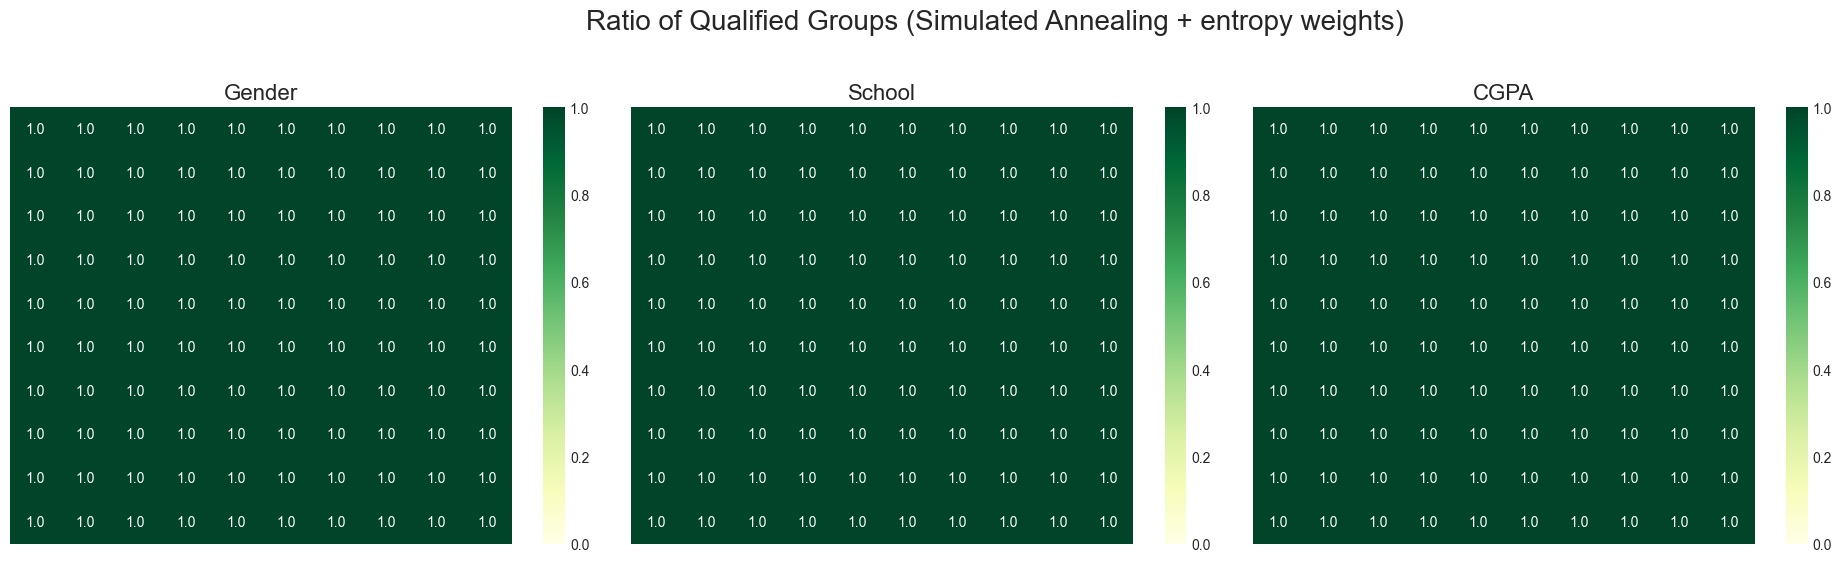

In [ ]:
main(cooling_rate=0.98, show_plot=(False,True), output=False, use_defalut_value=False)

Expected result (if input number is 10):

<img src="assets\10in1.png" width="50%">

# 10. Conclusion & Reflection

The results show that we successfully grouped 6000 students relatively evenly based on gender, school, and CGPA. 

In particular, the introduction and reuse of the `TutorialGroup`, `Group`, and `Student` classes kept the space complexity at $O(K*N)$ ($N$ represents the total number of students, and $K$ represents the number of times this data is stored, at a constant level.).

However, our algorithm still has some shortcomings that require improvement:
1. High Time Complexity
- For example, in the greedy grouping process, each time the group score is calculated, all information for all group members **must be re-examined**. Combined with the outer for loop for each student, the overall time complexity reaches $O(N^2)$ ($N$ represents the number of students in a Tutorial group). If the scoring criteria can be further improved to dynamically update scores, the time complexity can be reduced.
- For example, in the simulated annealing process, the number of iterations $I$ dominates the total time consumption. The higher the cooling rate, the more iterations, and the longer the consumption time. 


2. Limitations of the Entropy Method
- According to Shannon (1948), the maximum entropy of a piece of information is $\ln n$, ($n$ is the number of categories). This indicates that the more categories an attribute has, the higher its entropy ceiling.
- However, in the existing data, the number of genders < the number of schools < the number of different CGPA scores. This leads to a situation where, generally, gender is given a high weight, while CGPA is given a low weight. This is consistent with the previous entropy weighting calculation results.
    - With only two genders, the maximum entropy is $\ln 2 \approx 0.693$.
    - CGPA (taking G-1 as an example) has 27 types, and the maximum entropy is $\ln 27 \approx 3.296$.
    - Obviously, the difference is significant.
- Previous experiments showed that the greater the weight given to an attribute, the better the grouping effect of that attribute. This explains why in the previous heatmap, gender was almost entirely dark green, while CGPA showed both dark and light green.

If we can optimize the above issues, our algorithm will perform even better in terms of time efficiency and grouping effectiveness.

In [29]:
# Limitations of the entropy method
dataset = read_csv("assets/records.csv")
calc_ratio_dataset(dataset)
calc_weights(dataset)
gender = set(st.gender for st in dataset['G-1'].groupmate)
cgpa = set(st.cgpa for st in dataset['G-1'].groupmate)
print(f"Amount of diffenrent genders in G-1: {len(gender)}")
print(f"Amount of diffenrent CGPA in G-1: {len(cgpa)}")
print(f"Weights of G-1: {dataset['G-1'].weights}")

Amount of diffenrent genders in G-1: 2
Amount of diffenrent CGPA in G-1: 27
Weights of G-1: {'School': 0.3682010086876191, 'Gender': 0.5105196722607507, 'CGPA': 0.1212793190516302}


# 11. Reference
- Guiasu, R. C., & Guiasu, S. (2010). The Rich-Gini-Simpson quadratic index of biodiversity. Natural Science, 2(10), 1130.
- Kirkpatrick, S., Gelatt Jr, C. D., & Vecchi, M. P. (1983). Optimization by simulated annealing. science, 220(4598), 671-680.
- Shannon, C. E. (1948). A mathematical theory of communication. The Bell system technical journal, 27(3), 379-423.
- Temlyakov, V. N. (2008). Greedy approximation. Acta Numerica, 17, 235-409.
- Wikipedia contributors. (2025, July 4). Simulated annealing. Wikipedia, The Free Encyclopedia. https://zh.wikipedia.org/wiki/%E6%A8%A1%E6%8B%9F%E9%80%80%E7%81%AB

# 12. Declaration for the Use of AI Tools

|Full Name  |Date      |A or B|
|:----------|:---------|:-----|
|Bu Chenfei |13/11/2025|B     |
|Chen Letong|13/11/2025|B     |
|Chen Sijing|13/11/2025|B     |
|Yu Jingyao |13/11/2025|B     |
|Zhang Yiran|13/11/2025|B     |

### Bu Chenfei

|Name                |Bu Chenfei|
|:-------------------|:---------|
|Name of AI tool     |ChatGPT|
|Input prompt        |How to import data from a file into Python? |
|Date generated      |29/10/2025 |
|Output generated    |Importing data from a file in Python depends on its file type. Different file types require different import methods. Below is a summary of the most common scenarios: Text files (.txt): `with open('data.txt', 'r', encoding='utf-8') as f:` CSV files (.csv): Pandas is recommended. `import pandas as pd. df = pd.read_csv('data.csv')` Excel files: `import pandas as pd. df = pd.read_excel('data.xlsx')` JSON files (.json): `import json.with open('data.json', 'r', encoding='utf-8') as f:` |
|Output screenshoot  |<img src="assets\ai_declaration\BuChenfei_1.1.jpg" width="10%"><img src="assets\ai_declaration\BuChenfei_1.2.jpg" width="10%"><img src="assets\ai_declaration\BuChenfei_1.3.jpg" width="10%"><img src="assets\ai_declaration\BuChenfei_1.4.jpg" width="10%"><img src="assets\ai_declaration\BuChenfei_1.5.jpg" width="10%"> |
|Impact on submission|Inspiration of reading the CSV file |

|Name                |Bu Chenfei|
|:-------------------|:---------|
|Name of AI tool     |ChatGPT|
|Input prompt        |I don't understand how to calculate weights using the entropy weight method.|
|Date generated      |29/10/2025 |
|Output generated    |Entropy weighting is an objective weighting method used for multi-indicator evaluation. The greater the change in the data of each indicator, the more information it contains; indicators with small changes contain less information and contribute less to the overall evaluation; the weight of each indicator is calculated based on the amount of information it contains.|
|Output screenshoot  |<img src="assets\ai_declaration\BuChenfei_2.1.jpg" width="10%"><img src="assets\ai_declaration\BuChenfei_2.2.jpg" width="10%"><img src="assets\ai_declaration\BuChenfei_2.3.jpg" width="10%"><img src="assets\ai_declaration\BuChenfei_2.4.jpg" width="10%"><img src="assets\ai_declaration\BuChenfei_2.5.jpg" width="10%"> |
|Impact on submission|Understand and calculate the entropy method |

### Chen Letong

|Name                |Chen Letong|
|:-------------------|:---------|
|Name of AI tool     |Doubao   |
|Input prompt        |Explain the Greedy Algorithm |
|Date generated      |8/11/2025|
|Output generated    |A greedy algorithm makes a sequence of decisions.For each decision, it picks the locally optimal choice—the shortest, the cheapest, the fastest, the most profitable, etc.It does not reconsider past decisions, try all possibilities, backtrack. It simply assumes: Local optimum + local optimum + … → global optimum (But this works only for certain types of problems.)|
|Output screenshoot  | <img src="assets\ai_declaration\ChenLetong_1.jpg" width="3%">|
|Impact on submission|Inspiration of the markdown on Jupyter Notebook |

|Name                |Chen Letong|
|:-------------------|:---------|
|Name of AI tool     |ChatGPT   |
|Input prompt        |Explain the Annealing Algorithm |
|Date generated      |8/11/2025|
|Output generated    |Simulated Annealing is inspired by how metals are heated and then slowly cooled to achieve a stable, low-energy structure. The algorithm applies the same idea to optimization problems. Start at a high “temperature,” allowing broad exploration. Gradually lower the temperature, reducing randomness. When the temperature is near zero, the system “freezes” into a good solution. At the end, the algorithm behaves like a greedy method and settles on a near-optimal solution.|
|Output screenshoot  |<img src="assets\ai_declaration\ChenLetong_2.jpg" width="5%"> |
|Impact on submission|Inspiration of the markdown on Jupyter Notebook |

### Chen Sijing

|Name                |Chen Sijing|
|:-------------------|:---------|
|Name of AI tool     |ChatGPT   |
|Input prompt        |How to find the optimal parameters of the simulated annealing algorithm, such as the cooling rate and maximum number of iterations?|
|Date generated      |3/11/2025 |
|Output generated    |Parameter tuning is indeed one of the core challenges of the Simulated Annealing (SA) algorithm — because parameters such as initial temperature, cooling rate, minimum temperature, and maximum iterations strongly affect both convergence speed and the quality of the final solution. Dynamically adjust temperature or iteration count during execution. Acceptance rate (of worse solutions) drops below 10% → reheat slightly. This makes the algorithm adapt better to varying problem landscapes.|
|Output screenshoot  |<img src="assets\ai_declaration\ChenSijing_1.1.jpg" width="10%"><img src="assets\ai_declaration\ChenSijing_1.2.jpg" width="10%"><img src="assets\ai_declaration\ChenSijing_1.3.jpg" width="10%"><img src="assets\ai_declaration\ChenSijing_1.4.jpg" width="10%">|
|Impact on submission|It has almost no impact; it is only for my own learning.|

|Name                |Chen Sijing|
|:-------------------|:---------|
|Name of AI tool     |ChatGPT   |
|Input prompt        |How to use deepcopy?|
|Date generated      |3/11/2025 |
|Output generated    |In Python, assignment (=) does not actually copy an object; it only creates a new reference. A shallow copy creates a new outer object, but the inner objects are still shared. A deep copy recursively copies all levels of the object, creating a completely independent copy. In SA, you are only copying the reference. Modifying new_state also changes current_state, which can break the algorithm logic.|
|Output screenshoot  | <img src="assets\ai_declaration\ChenSijing_2.1.jpg" width="10%"><img src="assets\ai_declaration\ChenSijing_2.2.jpg" width="10%"><img src="assets\ai_declaration\ChenSijing_2.3.jpg" width="10%"><img src="assets\ai_declaration\ChenSijing_2.4.jpg" width="10%">|
|Impact on submission|It allowed me to learn about deepcopy and applied it in the initial version of the code, but soon it was optimised.|

### Yu Jingyao

|Name                |Yu Jingyao|
|:-------------------|:---------|
|Name of AI tool     |Gemini 2.5 Pro   |
|Input prompt        |Can you recommend some nice colors for drawing in Matpoltlib? I prefer green tones. |
|Date generated      |11/11/2025 |
|Output generated    |<div> Of course, Matplotlib offers a variety of beautiful green color options to suit your preference for green-themed charts. Below are some recommended choices, covering named colors, colormaps, and more. Monochromatic Recommendations (Named Colors) You can use these color string names directly in Matplotlib's plotting functions.Basic and Vivid Greens:'green' or 'g': The most basic green.'lime': A vibrant stone gray.'forestgreen': A calm forest green.'darkgreen': A deep green.Fresh and Elegant Greens:'lightgreen': A light green.'palegreen': A pale green.'springgreen': A spring green 'aquamarine': A sea blue, leaning towards green.'mediumaquamarine': A medium sea blue.Other good green options:'seagreen': Sea green.'olive': Olive green.'chartreuse': Yellow-green. Green Colormaps For charts that need to show data hierarchy or gradient trends (such as heatmaps, scatter plots, etc.), using colormaps is a good choice. Here are some that contain rich green variations:viridis: This is one of Matplotlib's default colormaps, known for its perceptual uniformity, transitioning from yellow-green to dark blue-green, which is very beautiful and easy to read. Greens: A pure green gradient from light to dark.BuGn: A sequential colormap transitioning from light blue to green. PuBuGn: A beautiful colormap from purple through blue to green.YlGn: A colormap from yellow to green.gist_stern: Contains a gradient from dark blue to green. Using the Seaborn Palette Seaborn is a data visualization library based on Matplotlib that provides many preset and aesthetically pleasing color palettes. You can easily use Seaborn's green palette within Matplotlib.</div> |
|Output screenshoot  | <img src="assets\ai_declaration\YuJingyao_1.png" width="5%">|
|Impact on submission| Choose a nice color for graphs in this notebook. |

|Name                |Yu Jingyao|
|:-------------------|:---------|
|Name of AI tool     |Gemini 2.5 Pro   |
|Input prompt        |How do I insert a table of contents with hyperlinks at the beginning of a Jupyter Notebook? |
|Date generated      |11/11/2025 |
|Output generated    |You can manually create this table of contents by adding a Markdown cell at the top of your Notebook and using HTML and Markdown syntax. To ensure the links in the table of contents jump accurately, you first need to create an "anchor" in your Notebook for each chapter heading you want to link to. This is done by inserting an HTML `<a>` tag into the chapter's Markdown heading cell. Now that you've set up your target, create a new Markdown cell at the very top of your Notebook to write the table of contents. The links in the table of contents use Markdown's hyperlink syntax `[display text](#anchor name)`. Combining these two steps, when you run these Markdown cells, you'll see a clear table of contents at the top of your Notebook. Clicking any link in the table of contents will automatically scroll to the corresponding chapter in your Notebook.|
|Output screenshoot  | <img src="assets\ai_declaration\YuJingyao_2.png" width="5%">|
|Impact on submission| Design a catalog for whole notebook. |

### Zhang Yiran

|Name                |Zhang Yiran|
|:-------------------|:---------|
|Name of AI tool     |DeepSeek   |
|Input prompt        |What does `for i, group in enumerate(groups):` mean? |
|Date generated      |29/10/2025 |
|Output generated    |This is a way to iterate over a list while simultaneously retrieving the index and the element. Let me explain in detail: for index, element in enumerate(list): # Loop body This is the standard way to iterate over a list in Python when you need both the index and the element. |
|Output screenshoot  |<img src="assets\ai_declaration\ZhangYiran_1.jpg" width="5%"> |
|Impact on submission|Explain grammar |

|Name                |Zhang Yiran|
|:-------------------|:---------|
|Name of AI tool     |DeepSeek   |
|Input prompt        |In algorithms for random grouping and then swapping, the decision to swap is based on scores, which are determined by a combination of major, gender, and scores. Could this lead to some groups being balanced on certain metrics while being singular on others? How can this be avoided? |
|Date generated      |29/10/2025 |
|Output generated    |Yes, you've pointed out a very important issue. In random grouping and re-exchange algorithms, it's indeed possible to encounter situations where **some metrics are balanced while others are singular**. Problem Analysis: Limitations of Composite Scores **Problem**: A group might have: College diversity: 3 points (very good) Gender diversity: 1 point (single gender only) Academic diversity: 3 points (very good) Total score: 7 points (looks good, but single gender) Solution: Improved diversity scoring system Solution 1: Weighted minimum diversity scoring Solution 2: Multidimensional independent scoring system Solution 3: Constrained optimization exchange strategy |
|Output screenshoot  |<img src="assets\ai_declaration\ZhangYiran_2.jpg" width="2%"> |
|Impact on submission|Give inspiration in algorithm design |

|Name                |Zhang Yiran|
|:-------------------|:---------|
|Name of AI tool     |DeepSeek   |
|Input prompt        |What other algorithms can be used to solve this problem? Explain their grouping principles. |
|Date generated      |29/10/2025 |
|Output generated    |Besides hierarchical grouping and random exchange algorithms, there are several other algorithms that can solve this multi-dimensional balanced grouping problem. The following are other feasible algorithms and their grouping approaches: Genetic Algorithm, Simulated Annealing, Tabu Search, Ant Colony Optimization, Particle Swarm Optimization, Constraint Programming, Integer Linear Programming, Clustering-based Approach, Multi-objective Optimization, and Reinforcement Learning. Each of these algorithms has its advantages and disadvantages; in practical applications, it is often necessary to select the appropriate algorithm or combination of algorithms based on the specific problem's scale, constraints, and computational resources. |
|Output screenshoot  |<img src="assets\ai_declaration\ZhangYiran_3.jpg" width="2%"> |
|Impact on submission|Give inspiration in algorithm design |